# Calculate Pattern
- SmarAct in magnet, Zaber up to pole tip
- By hand, determined limits of angles
    - Limiting factor is clip from BATSPI card hitting Zaber stage
- For now run pattern over full range, but note central values (e.g. expect ~ -25 deg = 335 deg for angle 1 to have Hall probe vertical)

In [21]:
min_0 = 349895730-360000000
max_0 = 5841196
min_1 = 203075381-360000000
max_1 = 15242211

In [22]:
min_0, max_0

(-10104270, 5841196)

In [23]:
min_1, max_1

(-156924619, 15242211)

In [24]:
range_0 = max_0 - min_0
range_1 = max_1 - min_1
range_0, range_1

(15945466, 172166830)

In [25]:
range_0/1e6, range_1/1e6

(15.945466, 172.16683)

In [26]:
center_0 = max_0 - range_0/2
center_1 = max_1 - range_1/2
center_0, center_1

(-2131537.0, -70841204.0)

In [27]:
center_0/1e6, center_1/1e6

(-2.131537, -70.841204)

In [28]:
min_0/1e6, max_0/1e6

(-10.10427, 5.841196)

In [29]:
min_1/1e6, max_1/1e6

(-156.924619, 15.242211)

In [30]:
# range 1
15+155

170

In [39]:
# range 0
5+10

15

In [40]:
# steps 0
15/1 + 1

16.0

In [49]:
# steps 1
160 / 20 + 1

9.0

In [38]:
18*32

576

In [50]:
-145, -125, -105, -85, -65, -45, -25, -5, 15

(-145, -125, -105, -85, -65, -45, -25, -5, 15)

In [47]:
15+145

160

In [51]:
16 * 9

144

In [ ]:
-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5

In [54]:
(5-10)/2

-2.5

# Rotation Data

In [55]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [56]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
from pandas.api.types import is_numeric_dtype
from scipy.interpolate import interp1d
import lmfit as lm
from copy import deepcopy
#from dateutil import parser
from plotly import graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
%matplotlib inline

# local imports
from plotting import config_plots, datetime_plt
from load_slow import *
from Zaber_Magnet_Convert import *
# hallprobecalib package
from hallprobecalib.hpcplots import scatter3d, scatter2d, histo
from mu2e.mu2eplots import mu2e_plot3d

In [57]:
config_plots()

In [58]:
ddir = '/home/ckampa/Dropbox/LogFiles/'

In [59]:
# 8-10-21 11:48, probe 8, rotating with Zaber in magnet
# PGC @ 14 deg C
# 1 deg steps -9 -- +5 angle 0 (theta)
# 20 deg steps -145 -- +15 angle 1 (phi)
######
plotdir = '/home/ckampa/data/hallprobecalib_extras/plots/hall_probe_rotate/08-10-21_11:48/'
slowfile = ddir+'2021-08-10 114829.txt'
slowtempfile = ddir+'2021-08-10 114658slow.txt'

# Load Data

In [60]:
# temperature
df_temp = load_data(slowtempfile)

In [69]:
df_temp

Time  Magnet Current [A]  \
Datetime                                                         
2021-08-10 11:46:59  8/10/2021 11:46:59 AM           80.024100   
2021-08-10 11:47:30  8/10/2021 11:47:30 AM           80.023760   
2021-08-10 11:50:45  8/10/2021 11:50:45 AM           80.023760   
2021-08-10 11:53:44  8/10/2021 11:53:44 AM           80.023760   
2021-08-10 11:56:46  8/10/2021 11:56:46 AM           80.023760   
2021-08-10 11:59:44  8/10/2021 11:59:44 AM           80.023760   
2021-08-10 12:02:45  8/10/2021 12:02:45 PM           80.023760   
2021-08-10 12:05:47  8/10/2021 12:05:47 PM           80.023817   
2021-08-10 12:08:47  8/10/2021 12:08:47 PM           80.023817   
2021-08-10 12:11:46  8/10/2021 12:11:46 PM           80.023760   
2021-08-10 12:14:44  8/10/2021 12:14:44 PM           80.023760   
2021-08-10 12:17:45  8/10/2021 12:17:45 PM           80.023760   

                     Magnet Voltage [V]     Coil 1     Coil 2  LCW in Coil1  \
Datetime                                                                      
2021-08-10 11:46:59            9.558515  29.216721  29.193663     29.150049   
2021-08-10 11:47:30            9.563115  29.306730  29.183956     29.207329   
2021-08-10 11:50:45            9.563933  29.305491  29.204493     29.224676   
2021-08-10 11:53:44            9.564290  29.340757  29.239426     29.219616   
2021-08-10 11:56:46            9.564747  29.334633  29.237102     29.223396   
2021-08-10 11:59:44            9.565412  29.337351  29.223614     29.261026   
2021-08-10 12:02:45            9.566005  29.356295  29.256044     29.253525   
2021-08-10 12:05:47            9.566130  29.363659  29.289480     29.238579   
2021-08-10 12:08:47            9.566550  29.384020  29.274082     29.288496   
2021-08-10 12:11:46            9.567132  29.405386  29.301611     29.284538   
2021-08-10 12:14:44            9.567640  29.421652  29.313170     29.280363   
2021-08-10 12:17:45            9.567638  29.420412  29.323822     29.270163   

                     LCW out Coil 1  LCW in Coil 2  LCW out Coil 2  \
Datetime                                                             
2021-08-10 11:46:59       28.259008      26.766754       29.365707   
2021-08-10 11:47:30       28.339897      26.845579       29.428642   
2021-08-10 11:50:45       28.348658      26.823738       29.463852   
2021-08-10 11:53:44       28.365095      26.850912       29.438627   
2021-08-10 11:56:46       28.392872      26.761206       29.476416   
2021-08-10 11:59:44       28.415668      26.816616       29.475313   
2021-08-10 12:02:45       28.424547      26.785585       29.507530   
2021-08-10 12:05:47       28.362987      26.894419       29.478563   
2021-08-10 12:08:47       28.442068      26.835072       29.512848   
2021-08-10 12:11:46       28.477938      26.895285       29.542465   
2021-08-10 12:14:44       28.410747      26.911322       29.531792   
2021-08-10 12:17:45       28.403759      26.923620       29.516216   

                     Yoke (near pole)  ...  Zaber_Meas_Encoder_Y  \
Datetime                               ...                         
2021-08-10 11:46:59         21.327892  ...              424673.0   
2021-08-10 11:47:30         21.334927  ...              424673.0   
2021-08-10 11:50:45         21.335594  ...              424673.0   
2021-08-10 11:53:44         21.337931  ...              424673.0   
2021-08-10 11:56:46         21.330112  ...              424673.0   
2021-08-10 11:59:44         21.340387  ...              424673.0   
2021-08-10 12:02:45         21.341547  ...              424673.0   
2021-08-10 12:05:47         21.343216  ...              424673.0   
2021-08-10 12:08:47         21.347420  ...              424673.0   
2021-08-10 12:11:46         21.357695  ...              424673.0   
2021-08-10 12:14:44         21.351309  ...              424673.0   
2021-08-10 12:17:45         21.355396  ...              424673.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Dateti

In [68]:
df_temp['NMR [T]']

Datetime
2021-08-10 11:46:59    0.000000
2021-08-10 11:47:30    0.000000
2021-08-10 11:50:45    0.463524
2021-08-10 11:53:44    0.463525
2021-08-10 11:56:46    0.463525
2021-08-10 11:59:44    0.463525
2021-08-10 12:02:45    0.463524
2021-08-10 12:05:47    0.463523
2021-08-10 12:08:47    0.463523
2021-08-10 12:11:46    0.463523
2021-08-10 12:14:44    0.463523
2021-08-10 12:17:45    0.463523
Name: NMR [T], dtype: float64

In [70]:
len(df_temp)

12

In [71]:
df_temp.tail()

Time  Magnet Current [A]  \
Datetime                                                         
2021-08-10 12:05:47  8/10/2021 12:05:47 PM           80.023817   
2021-08-10 12:08:47  8/10/2021 12:08:47 PM           80.023817   
2021-08-10 12:11:46  8/10/2021 12:11:46 PM           80.023760   
2021-08-10 12:14:44  8/10/2021 12:14:44 PM           80.023760   
2021-08-10 12:17:45  8/10/2021 12:17:45 PM           80.023760   

                     Magnet Voltage [V]     Coil 1     Coil 2  LCW in Coil1  \
Datetime                                                                      
2021-08-10 12:05:47            9.566130  29.363659  29.289480     29.238579   
2021-08-10 12:08:47            9.566550  29.384020  29.274082     29.288496   
2021-08-10 12:11:46            9.567132  29.405386  29.301611     29.284538   
2021-08-10 12:14:44            9.567640  29.421652  29.313170     29.280363   
2021-08-10 12:17:45            9.567638  29.420412  29.323822     29.270163   

                     LCW out Coil 1  LCW in Coil 2  LCW out Coil 2  \
Datetime                                                             
2021-08-10 12:05:47       28.362987      26.894419       29.478563   
2021-08-10 12:08:47       28.442068      26.835072       29.512848   
2021-08-10 12:11:46       28.477938      26.895285       29.542465   
2021-08-10 12:14:44       28.410747      26.911322       29.531792   
2021-08-10 12:17:45       28.403759      26.923620       29.516216   

                     Yoke (near pole)  ...  Zaber_Meas_Encoder_Y  \
Datetime                               ...                         
2021-08-10 12:05:47         21.343216  ...              424673.0   
2021-08-10 12:08:47         21.347420  ...              424673.0   
2021-08-10 12:11:46         21.357695  ...              424673.0   
2021-08-10 12:14:44         21.351309  ...              424673.0   
2021-08-10 12:17:45         21.355396  ...              424673.0   

                     Zaber_Meas_Micron_Y  Zaber_Meas_Encoder_Z  \
Datetime                                                         
2021-08-10 12:05:47        165887.890625             1728906.0   
2021-08-10 12:08:47        165887.890625             1728906.0   
2021-08-10 12:11:46        165887.890625             1728906.0   
2021-08-10 12:14:44        165887.890625             1728906.0   
2021-08-10 12:17:45        165887.890625             1728906.0   

                     Zaber_Meas_Micron_Z  seconds_delta  hours_delta  \
Datetime                                                               
2021-08-10 12:05:47         675353.90625         1128.0     0.313333   
2021-08-10 12:08:47         675353.90625         1308.0     0.363333   
2021-08-10 12:11:46         675353.90625         1487.0     0.413056   
2021-08-10 12:14:44         675353.90625         1665.0     0.462500   
2021-08-10 12:17:45         675353.90625         1846.0     0.512778   

                     days_delta  magnet_X_mm  magnet_Y_mm  magnet_Z_mm  
Datetime                                                                
2021-08-10 12:05:47    0.013056         10.9   127.921875    93.300391  
2021-08-10 12:08:47    0.015139         10.9   127.921875    93.300391  
2021-08-10 12:11:46    0.017211         10.9   127.921875    93.300391  
2021-08-10 12:14:44    0.019271         10.9   127.921875    93.300391  
2021-08-10 12:17:45    0.021366         10.9   127.921875    93.300391  

[5 rows x 57 columns]

In [72]:
## FIXME! only read in first line to get header
df_headers = load_data(slowfile, header=None)
cols = list(df_headers.columns)

In [73]:
cols

['Time',
 'Magnet Current [V]',
 'Magnet Voltage [V]',
 'NMR [T]',
 'NMR [FFT]',
 '2F0000000D5EC73A_Raw_X',
 '2F0000000D5EC73A_Raw_Y',
 '2F0000000D5EC73A_Raw_Z',
 '2F0000000D5EC73A_Raw_T',
 '2F0000000D5EC73A_Cal_X',
 '2F0000000D5EC73A_Cal_Y',
 '2F0000000D5EC73A_Cal_Z',
 '2F0000000D5EC73A_Cal_T',
 'SmarAct_Pattern_Angle_1',
 'SmarAct_Pattern_Angle_2',
 'SmarAct_Meas_Angle_1',
 'SmarAct_Meas_Rotation_Angle_1',
 'SmarAct_Meas_Angle_2',
 'SmarAct_Meas_Rotation_Angle_2',
 'seconds_delta',
 'hours_delta',
 'days_delta']

In [74]:
#cols[0:3]

In [75]:
#cols[44:-6]

In [76]:
## ???
'''
# ACCOUNTS FOR FLIPPED MICRON/ENCODER
main_header = cols[0:3] + cols[43:53] +\
['Zaber_Meas_Micron_X', 'Zaber_Meas_Encoder_X', 'Zaber_Meas_Micron_Y', 'Zaber_Meas_Encoder_Y',
 'Zaber_Meas_Micron_Z', 'Zaber_Meas_Encoder_Z'] + cols[59:-6] #+ ['']
#main_header
'''
0;#

In [78]:
main_header = cols

In [79]:
len(main_header)

22

In [80]:
# main data
df = load_data(slowfile, header=main_header)

In [81]:
df.tail()

Time  Magnet Current [V]  \
Datetime                                                         
2021-08-10 12:08:51  8/10/2021 12:08:51 PM                 0.0   
2021-08-10 12:08:59  8/10/2021 12:08:59 PM                 0.0   
2021-08-10 12:09:07  8/10/2021 12:09:07 PM                 0.0   
2021-08-10 12:09:15  8/10/2021 12:09:15 PM                 0.0   
2021-08-10 12:09:23  8/10/2021 12:09:23 PM                 0.0   

                     Magnet Voltage [V]  NMR [T]  NMR [FFT]  \
Datetime                                                      
2021-08-10 12:08:51                 0.0      0.0        0.0   
2021-08-10 12:08:59                 0.0      0.0        0.0   
2021-08-10 12:09:07                 0.0      0.0        0.0   
2021-08-10 12:09:15                 0.0      0.0        0.0   
2021-08-10 12:09:23                 0.0      0.0        0.0   

                     2F0000000D5EC73A_Raw_X  2F0000000D5EC73A_Raw_Y  \
Datetime                                                              
2021-08-10 12:08:51                112900.0               -142269.0   
2021-08-10 12:08:59                 62499.0               -167811.0   
2021-08-10 12:09:07                  6254.0               -174042.0   
2021-08-10 12:09:15                -49434.0               -160223.0   
2021-08-10 12:09:23                -97838.0               -128113.0   

                     2F0000000D5EC73A_Raw_Z  2F0000000D5EC73A_Raw_T  \
Datetime                                                              
2021-08-10 12:08:51              -1269160.0                 17501.0   
2021-08-10 12:08:59              -1268472.0                 17445.0   
2021-08-10 12:09:07              -1268431.0                 17413.0   
2021-08-10 12:09:15              -1268681.0                 17420.0   
2021-08-10 12:09:23              -1269577.0                 17391.0   

                     2F0000000D5EC73A_Cal_X  ...  2F0000000D5EC73A_Cal_T  \
Datetime                                     ...                           
2021-08-10 12:08:51                0.459268  ...                  17.501   
2021-08-10 12:08:59                0.459022  ...                  17.445   
2021-08-10 12:09:07                0.458893  ...                  17.413   
2021-08-10 12:09:15                0.458767  ...                  17.420   
2021-08-10 12:09:23                0.458788  ...                  17.391   

                     SmarAct_Pattern_Angle_1  SmarAct_Pattern_Angle_2  \
Datetime                                                                
2021-08-10 12:08:51                      7.0                      0.0   
2021-08-10 12:08:59                      7.0                     20.0   
2021-08-10 12:09:07                      7.0                     40.0   
2021-08-10 12:09:15                      7.0                     60.0   
2021-08-10 12:09:23                      7.0                     80.0   

                     SmarAct_Meas_Angle_1  SmarAct_Meas_Rotation_Angle_1  \
Datetime                                                                   
2021-08-10 12:08:51              5.000017                            0.0   
2021-08-10 12:08:59              5.000024                            0.0   
2021-08-10 12:09:07              4.999980                            0.0   
2021-08-10 12:09:15              5.000024                            0.0   
2021-08-10 12:09:23              4.999988                            0.0   

                     SmarAct_Meas_Angle_2  SmarAct_Meas_Rotation_Angle_2  \
Datetime                                                                   
2021-08-10 12:08:51            295.000010                           -1.0   
2021-08-10 12:08:59            315.000012                           -1.0   
2021-08-10 12:09:07            334.999993                           -1.0   
2021-08-10 12:09:15            355.000030                           -1.0   
2021-08-10 12:09:23             15.000011                            0.0   

                     secon

In [82]:
def get_probe_IDs(df):
    probes = [c[:-6] for c in df.columns if "Raw_X" in c]
    return sorted(probes)

In [83]:
probes = get_probe_IDs(df)
probe = probes[0]

In [84]:
probes, probe

(['2F0000000D5EC73A'], '2F0000000D5EC73A')

In [85]:
# Hall probe calculations
for p in probes:
    for t in ['Raw', 'Cal']:
        df[f'{p}_{t}_Bmag'] = (df[f'{p}_{t}_X']**2 + df[f'{p}_{t}_Y']**2 + df[f'{p}_{t}_Z']**2)**(1/2)
        df[f'{p}_{t}_Theta'] = np.arccos(df[f'{p}_{t}_Z']/df[f'{p}_{t}_Bmag'])
        df[f'{p}_{t}_Phi'] = np.arctan2(df[f'{p}_{t}_Y'],df[f'{p}_{t}_X'])

In [87]:

# df['Magnet Resistance [Ohm]'] = df['Magnet Voltage [V]'] / df['Magnet Current [A]']
# df['Coil Resistance [Ohm]'] = 2*df['Magnet Resistance [Ohm]']
# df['Magnet Power [W]'] = df['Magnet Voltage [V]'] * df['Magnet Current [A]']

In [88]:
t0 = '2021-08-10 11:48' # probe 8, 8-10
tf = '2021-08-10 12:10' # probe 8, 8-10, first pattern measurement

df_ = df.query(f'"{t0}" <= Datetime <= "{tf}"').copy()
#df_ = df.query(f'("{t0}" <= Datetime <= "{tf}") and (`NMR [T]` > 0.68)').copy()

In [89]:
len(df_), len(df)

(136, 136)

In [90]:
df_temp_ = df_temp.query(f'"{t0}" <= Datetime <= "{tf}"').copy()

In [91]:
len(df_temp_), len(df_temp)

(7, 12)

/tmp/ipykernel_435928/1743968442.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



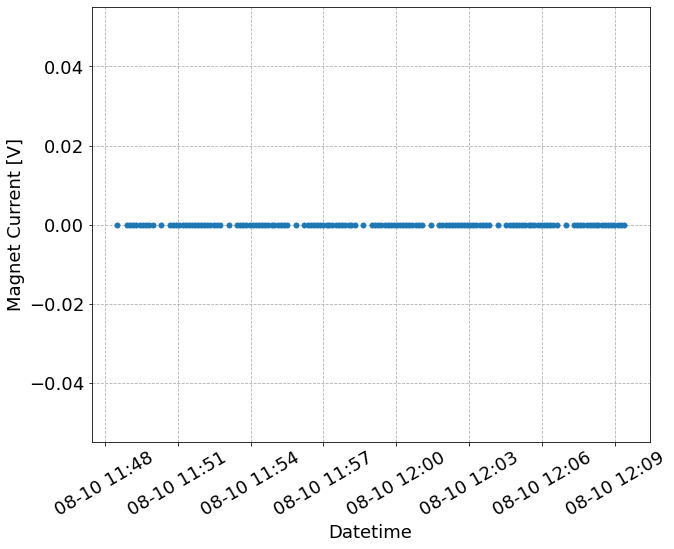

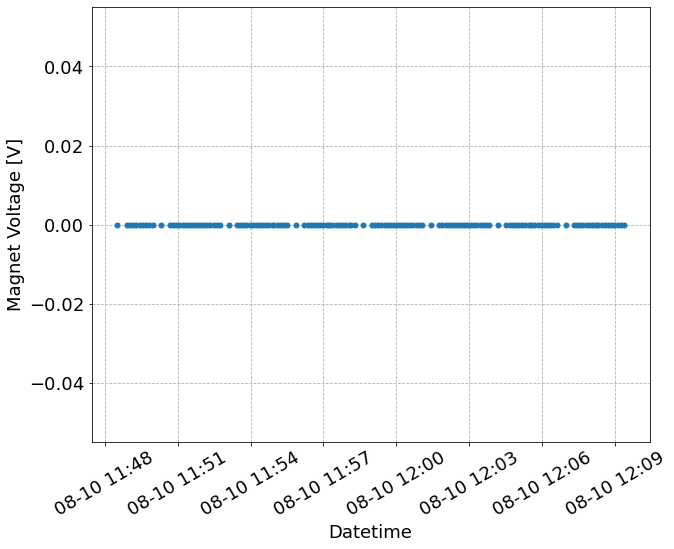

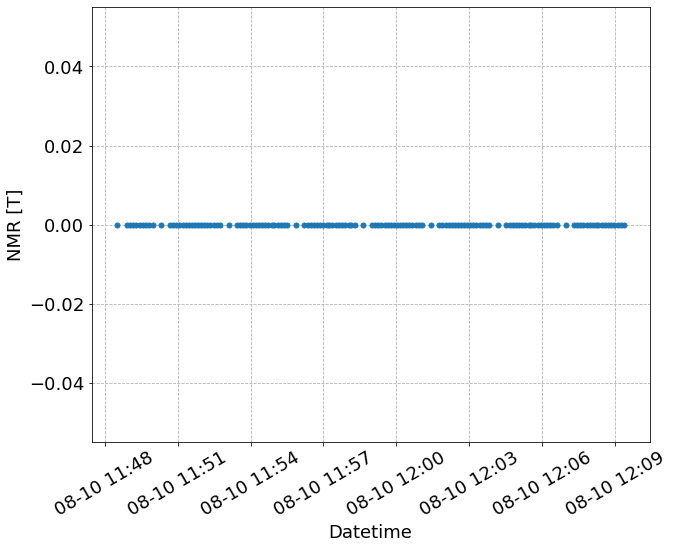

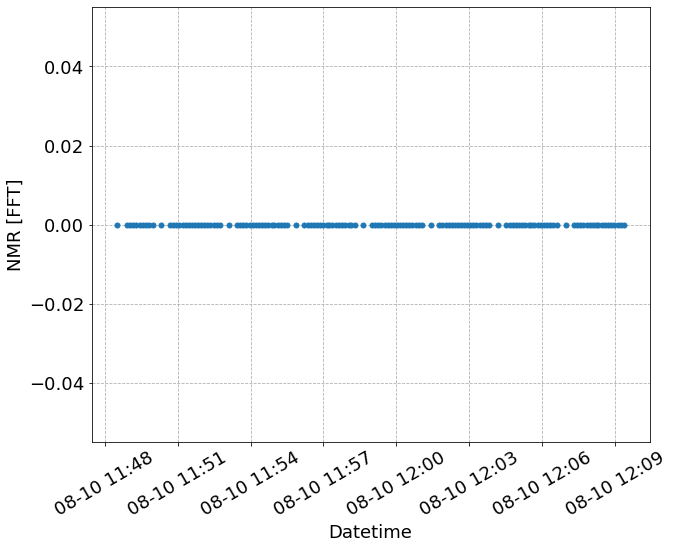

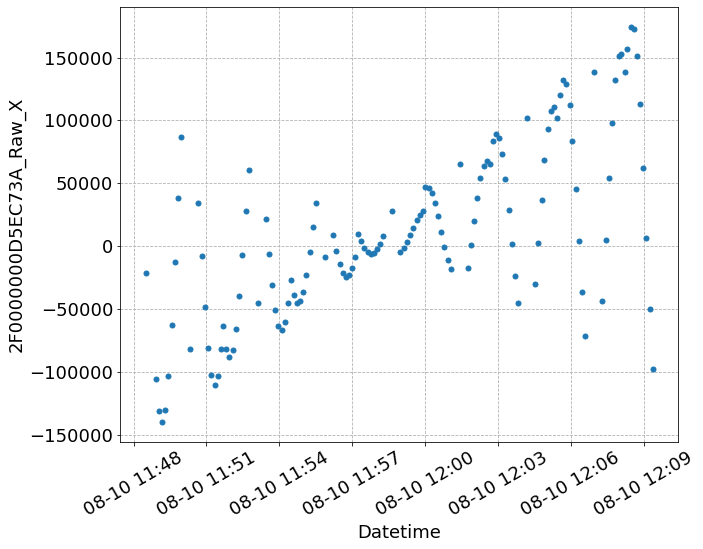

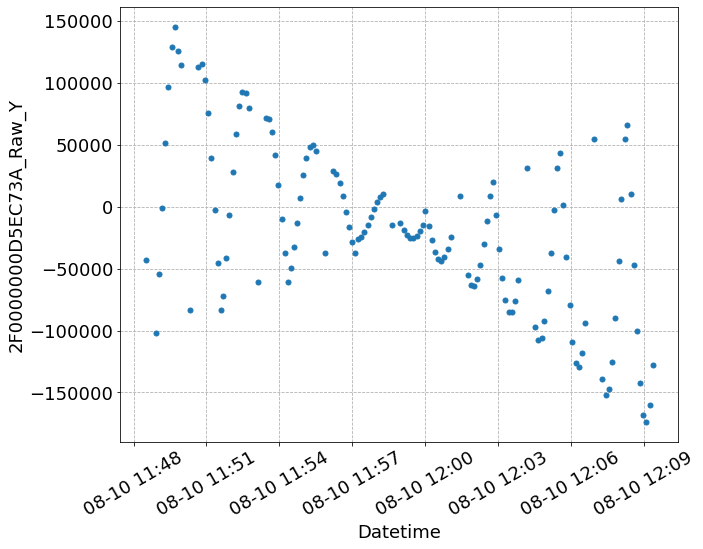

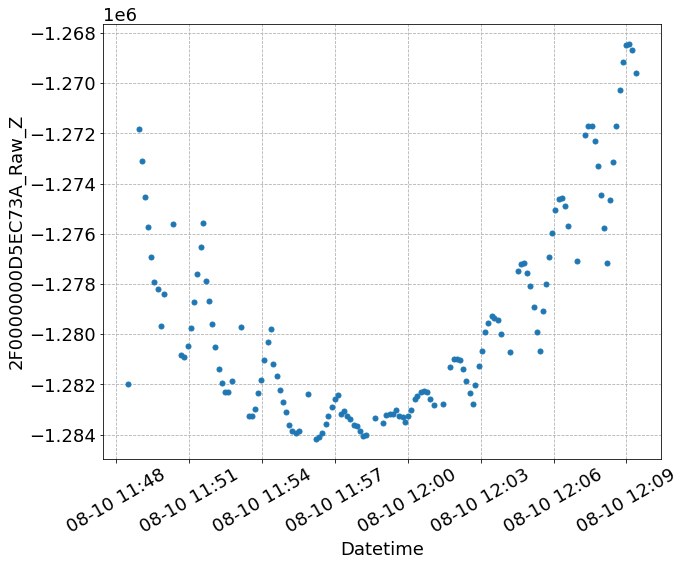

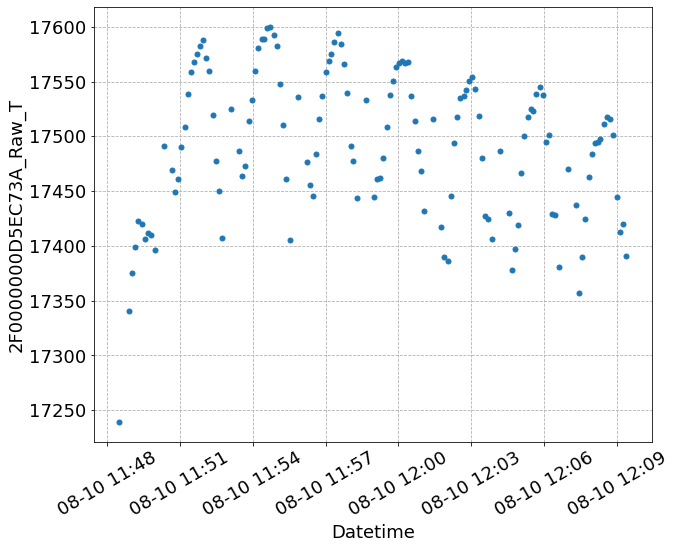

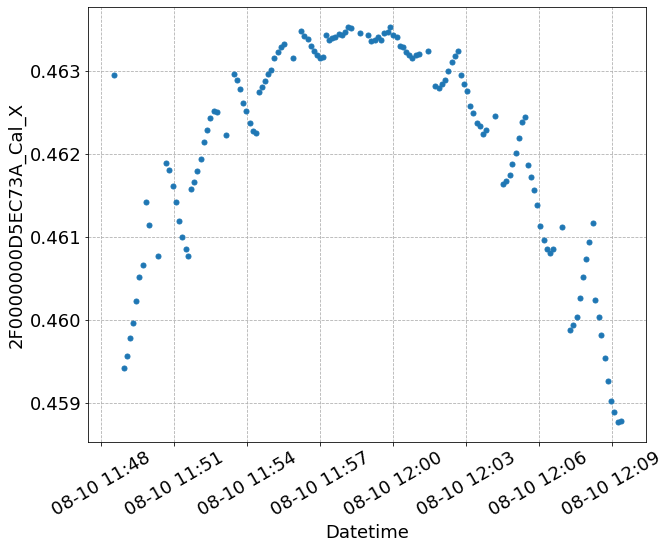

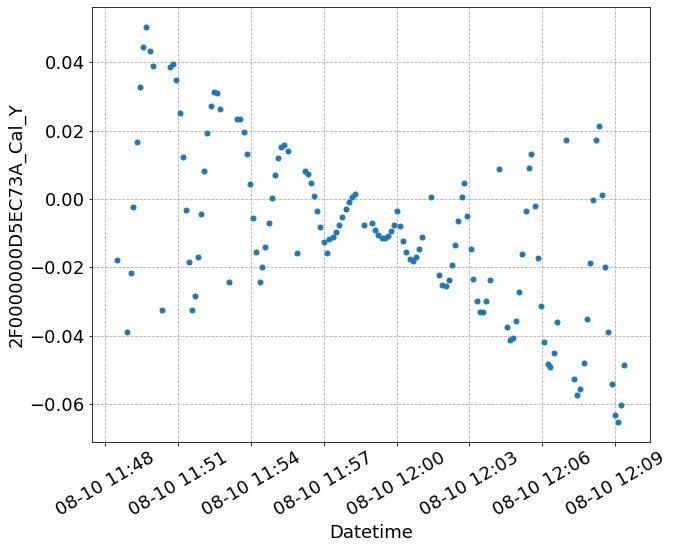

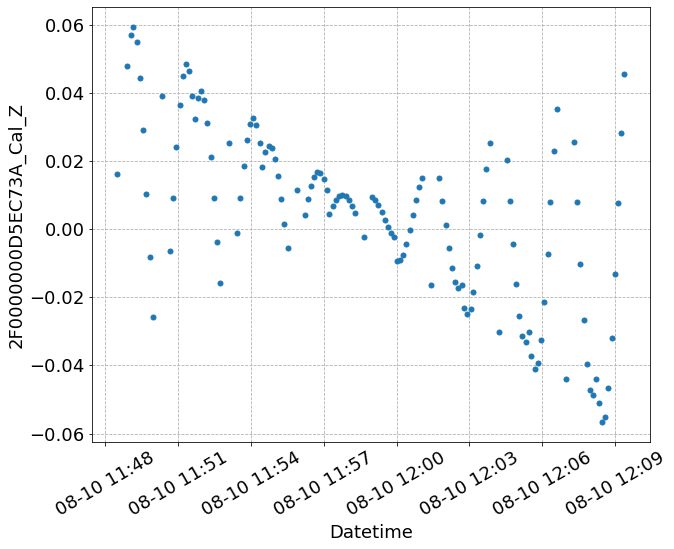

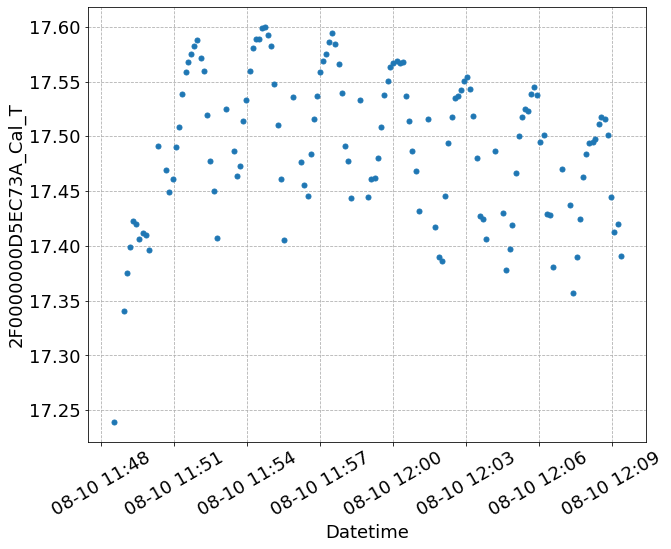

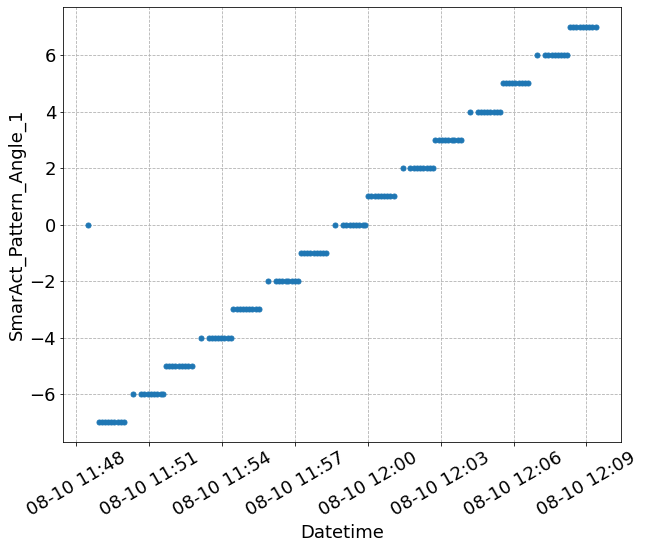

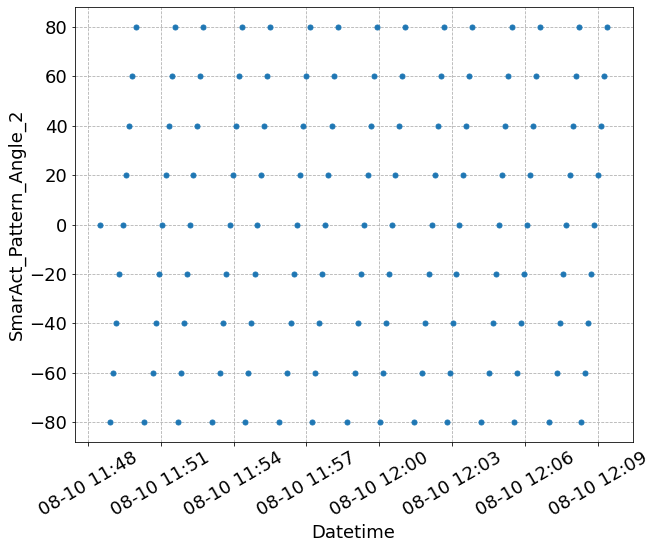

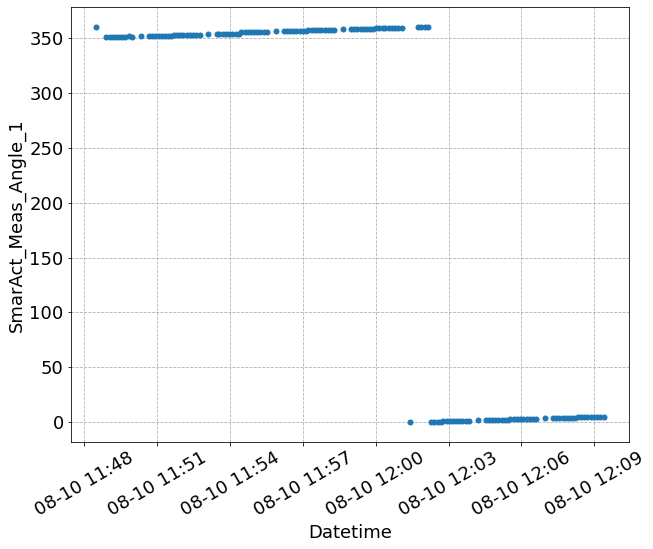

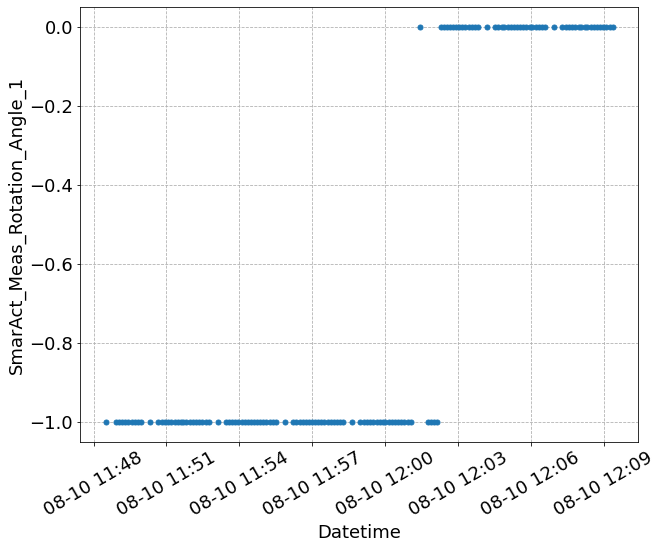

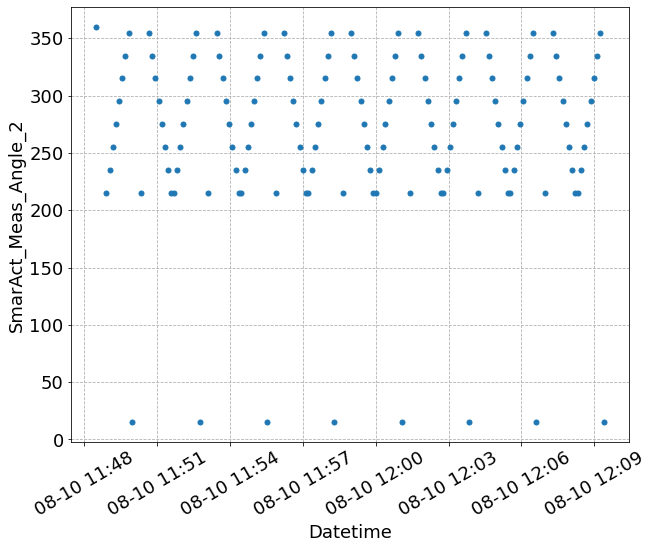

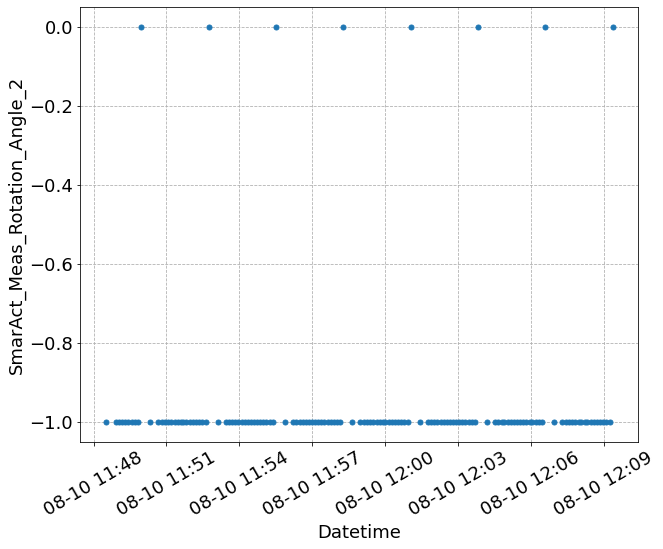

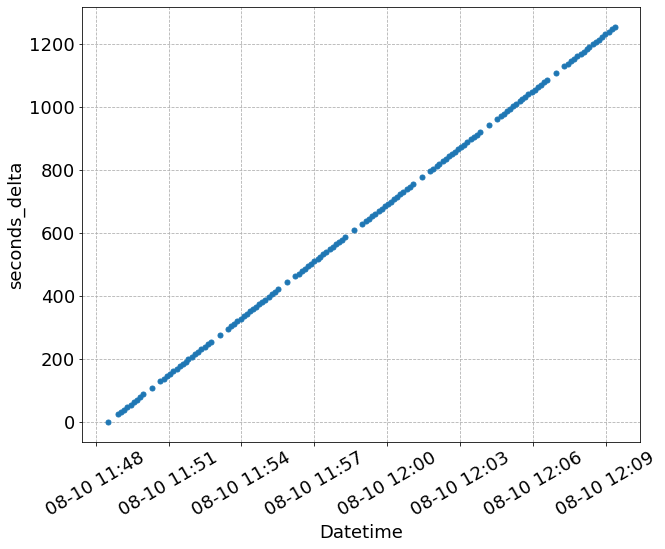

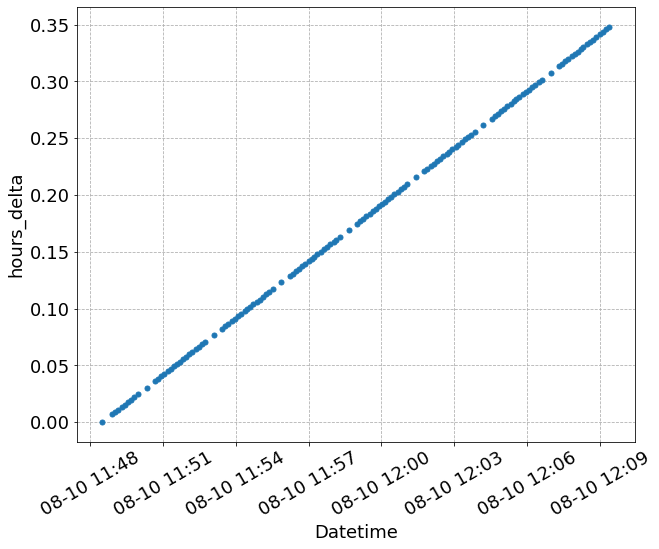

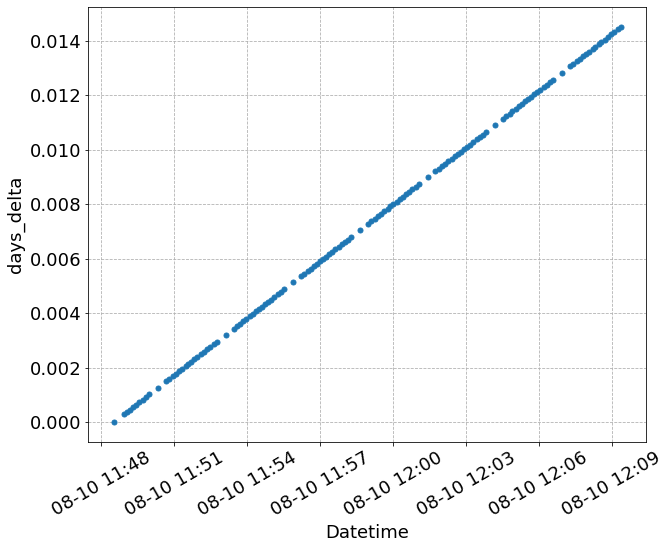

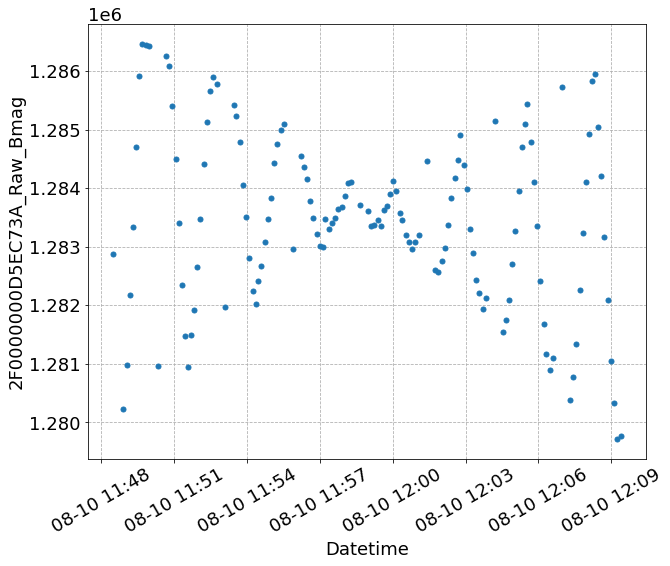

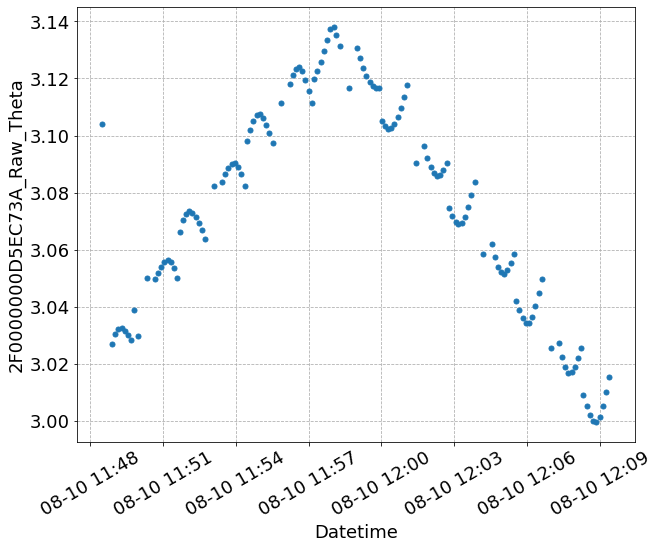

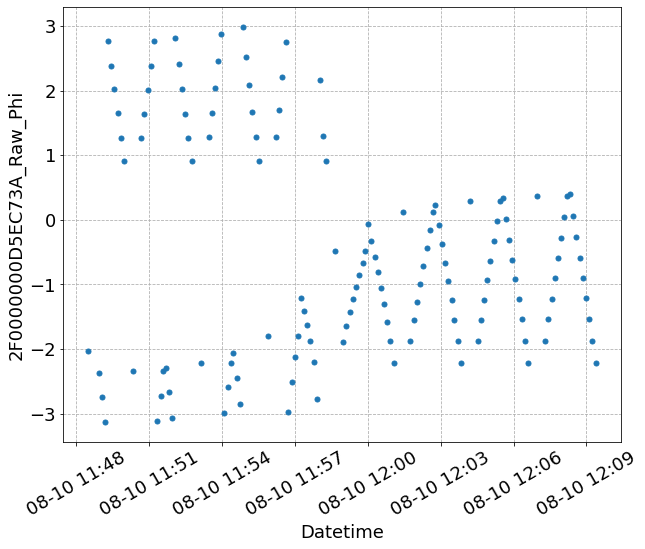

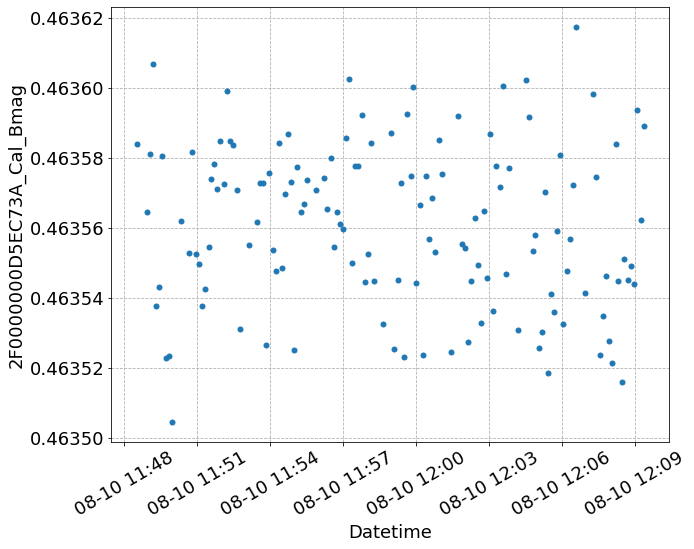

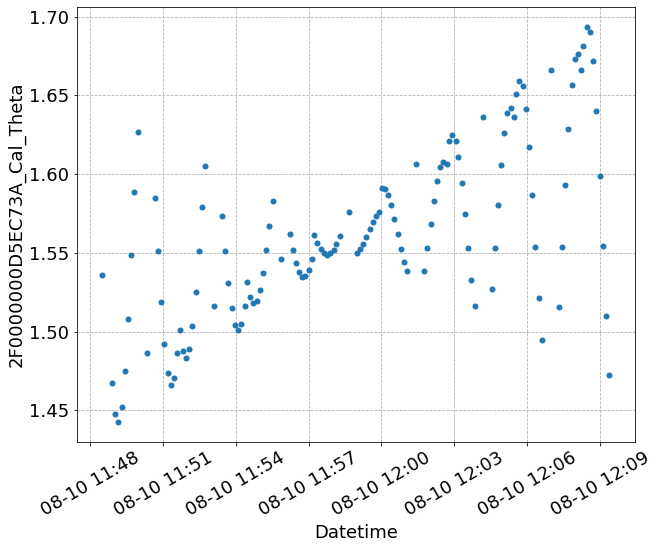

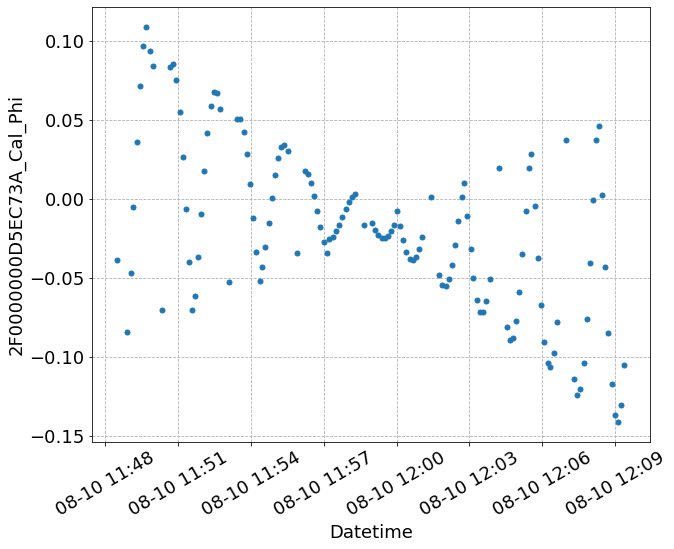

In [92]:
# plot vs. time
for col in df_.columns:
    if is_numeric_dtype(df_[col]):
        fig, ax = plt.subplots()
        ax = datetime_plt(ax, df_.index, df_[col], nmaj=6, Locator='Minute')
        ax.set_xlabel('Datetime')
        ax.set_ylabel(col)

/tmp/ipykernel_435928/2477770201.py:4: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



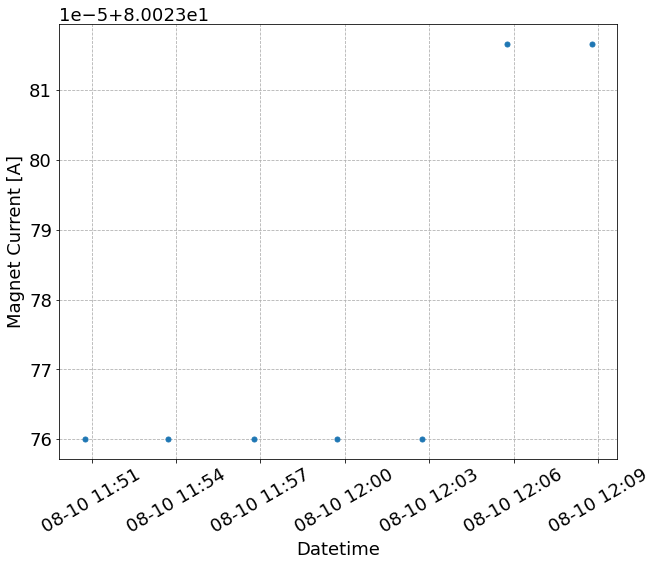

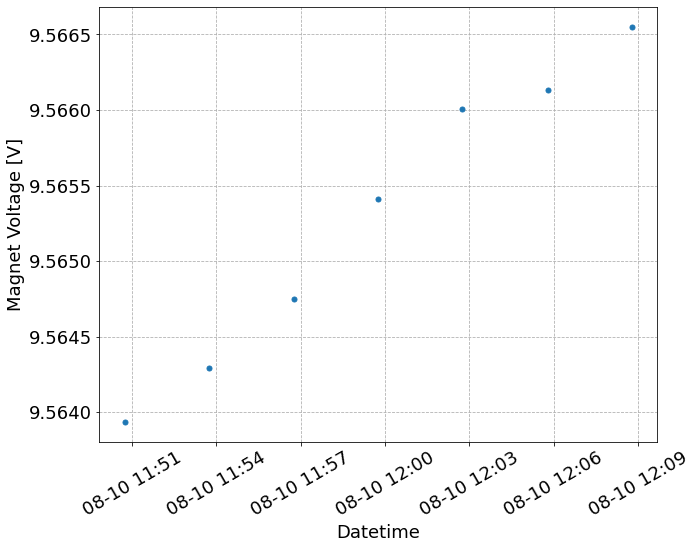

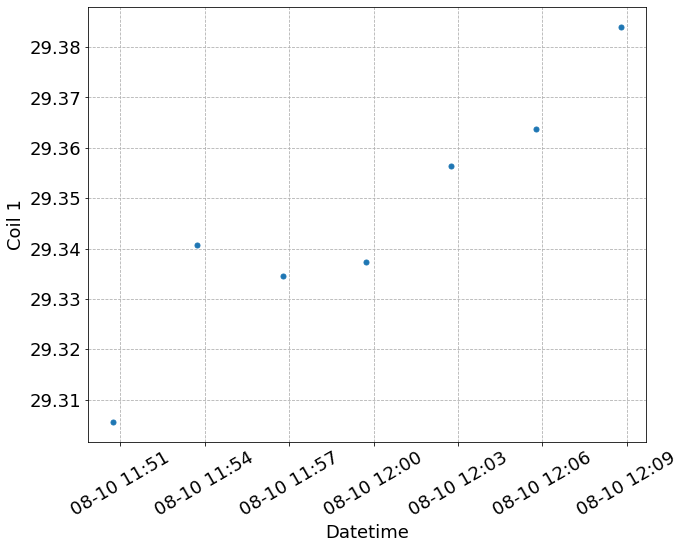

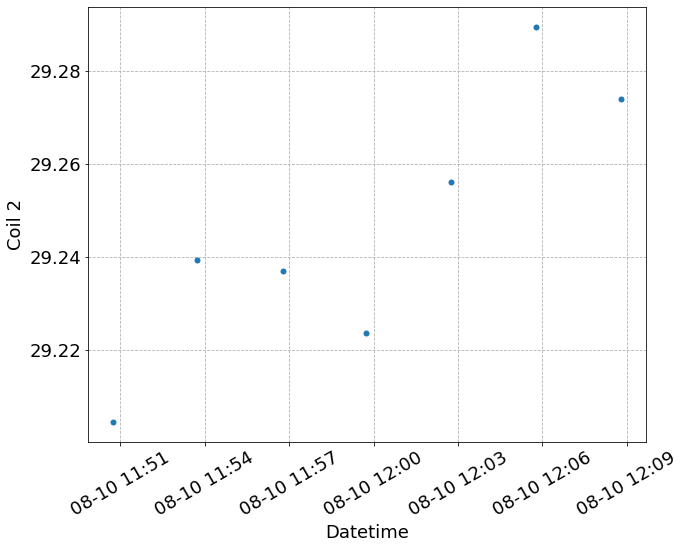

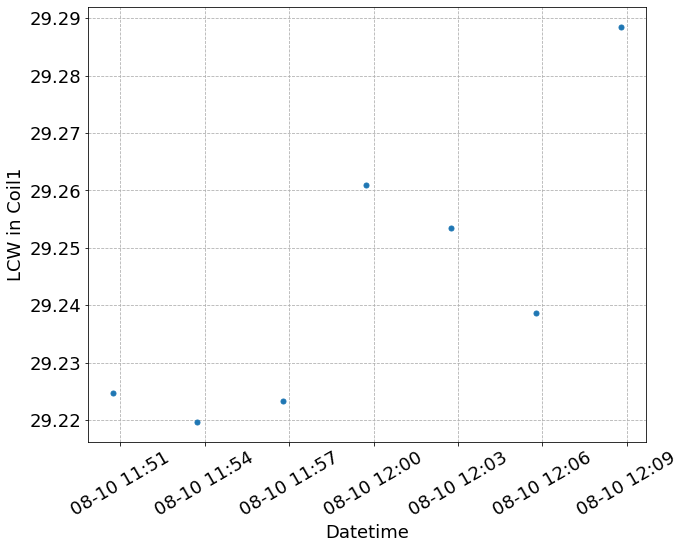

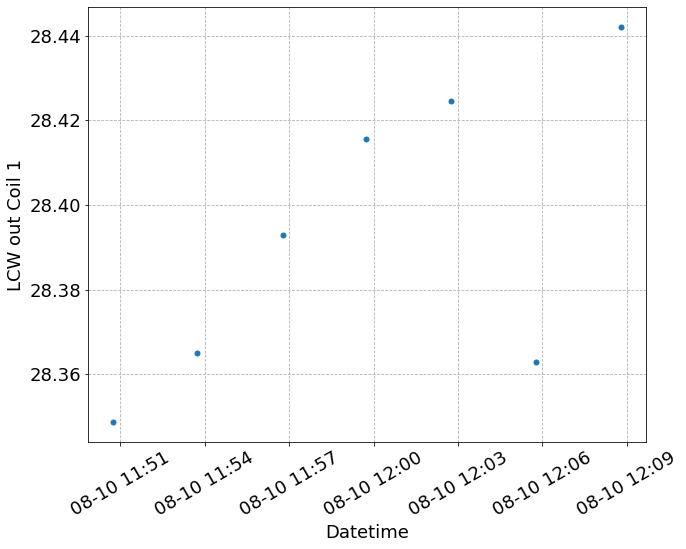

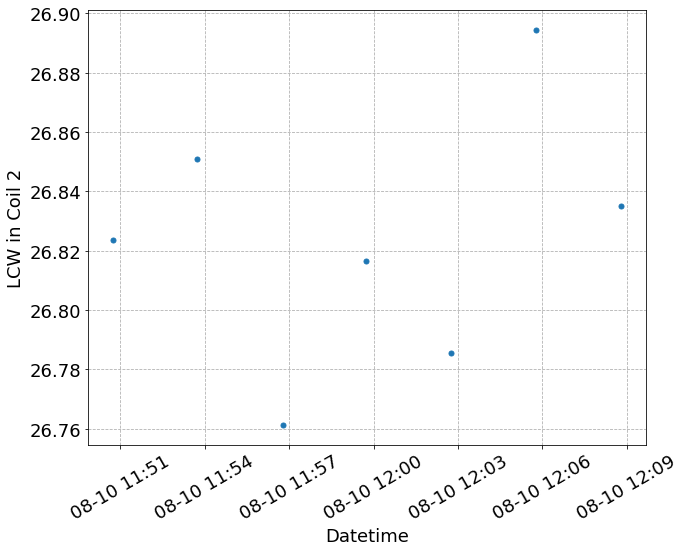

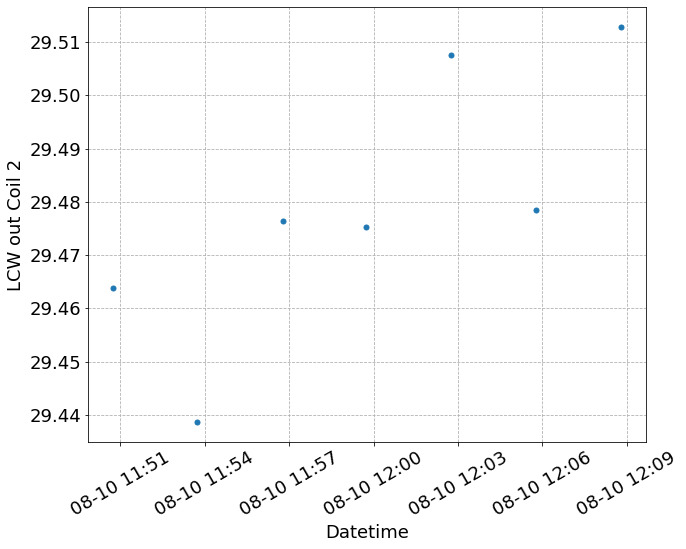

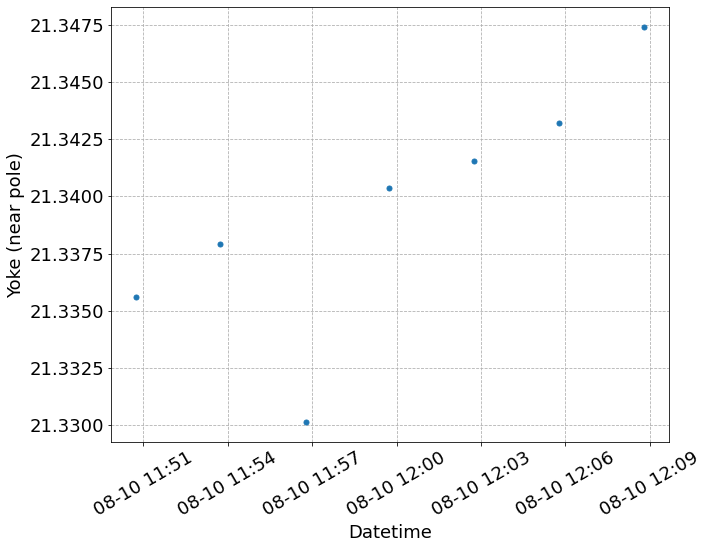

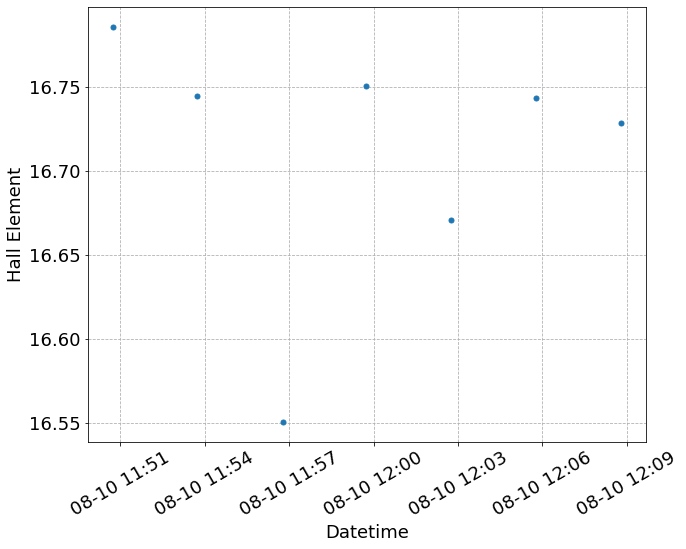

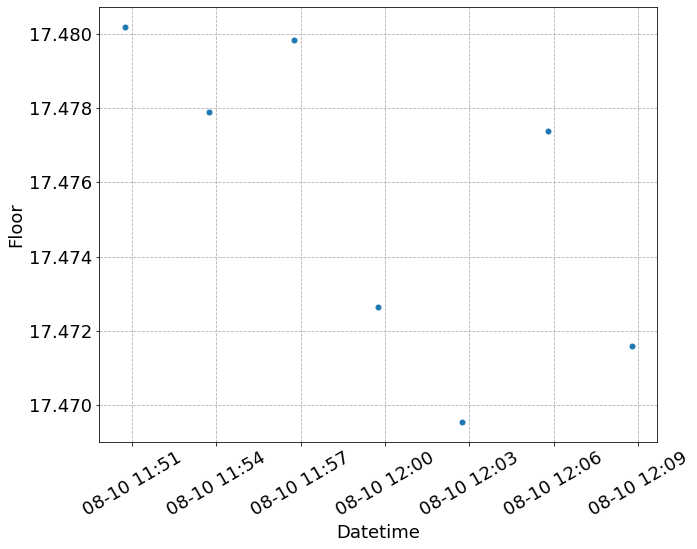

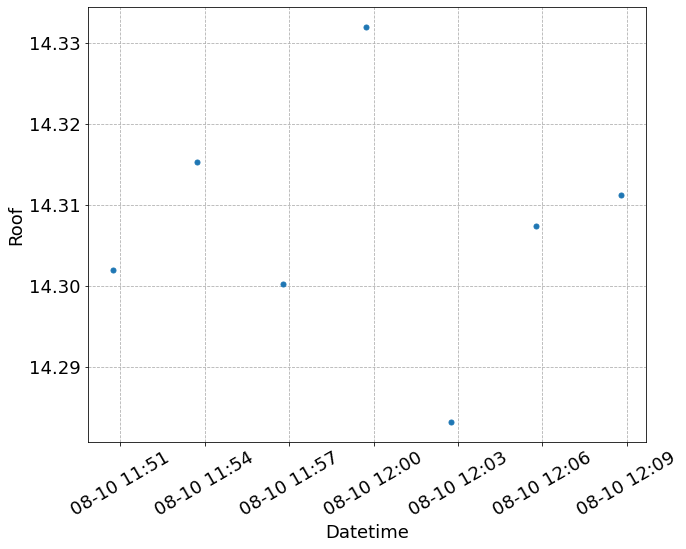

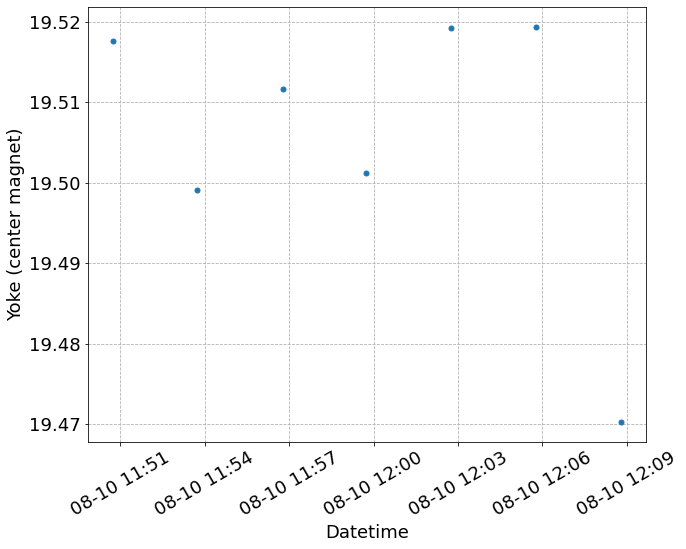

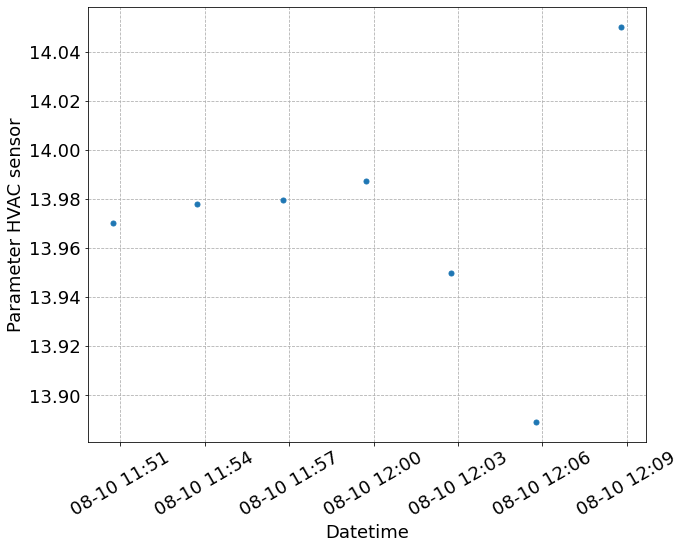

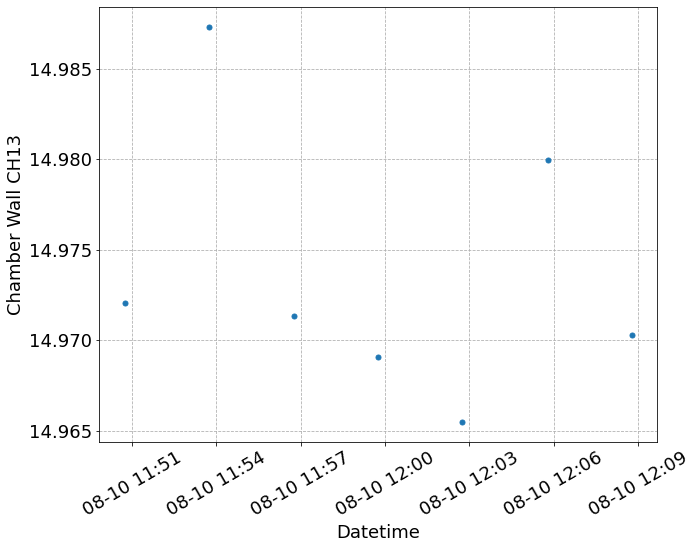

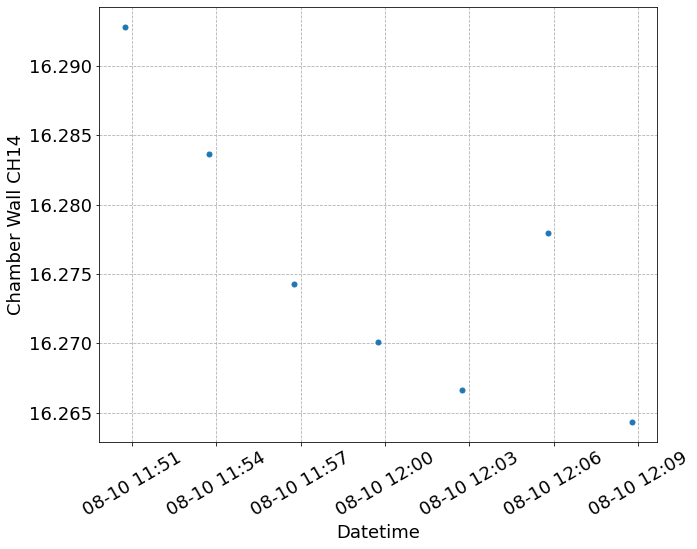

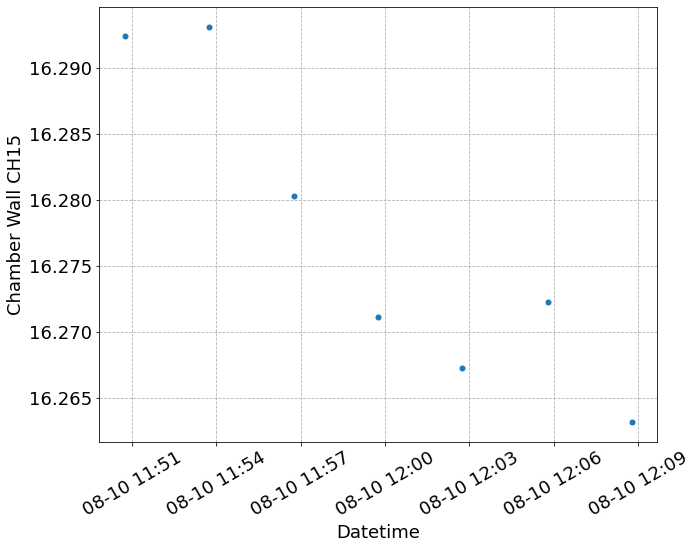

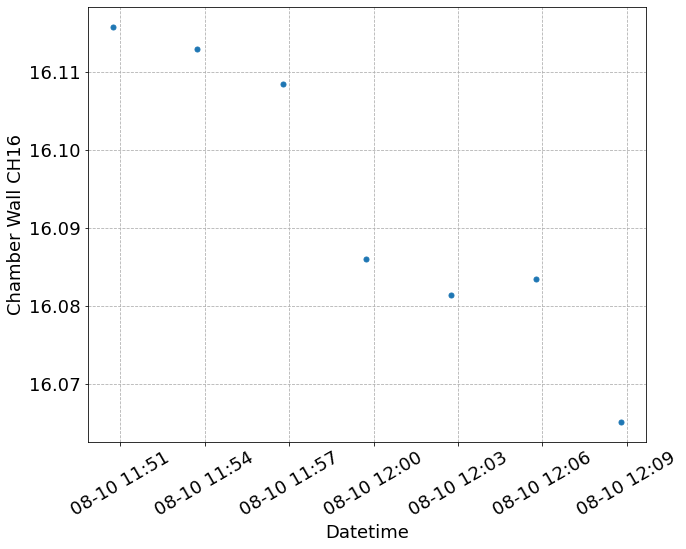

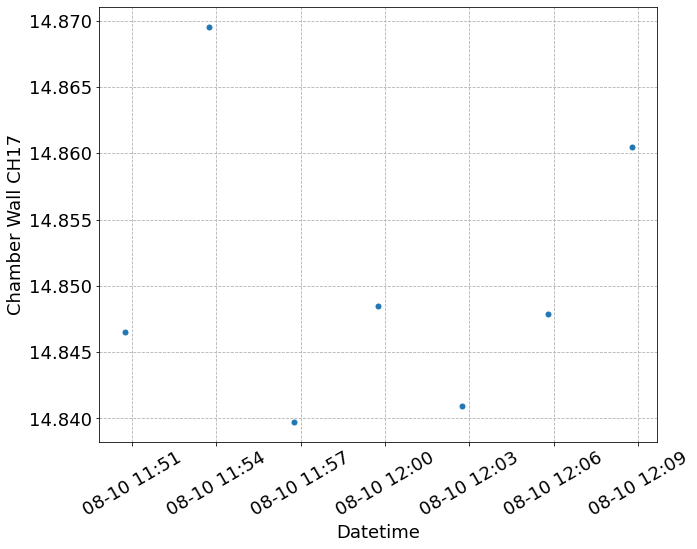

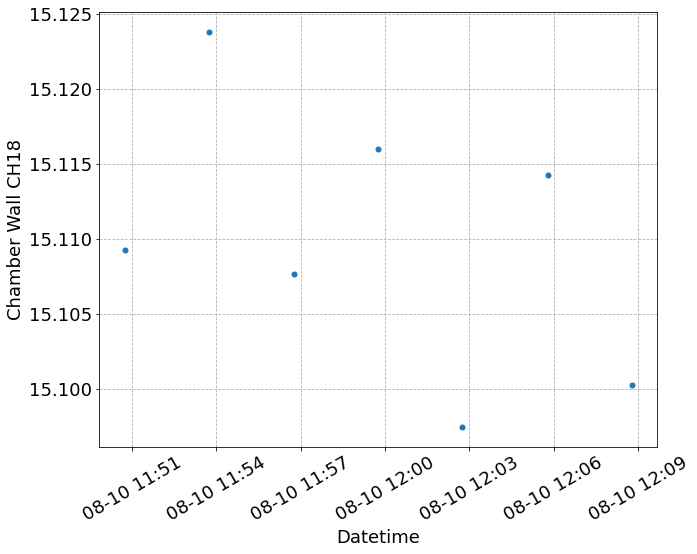

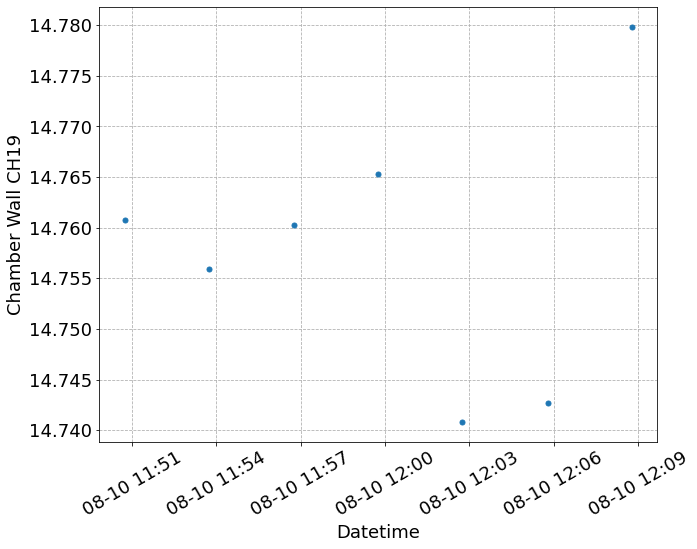

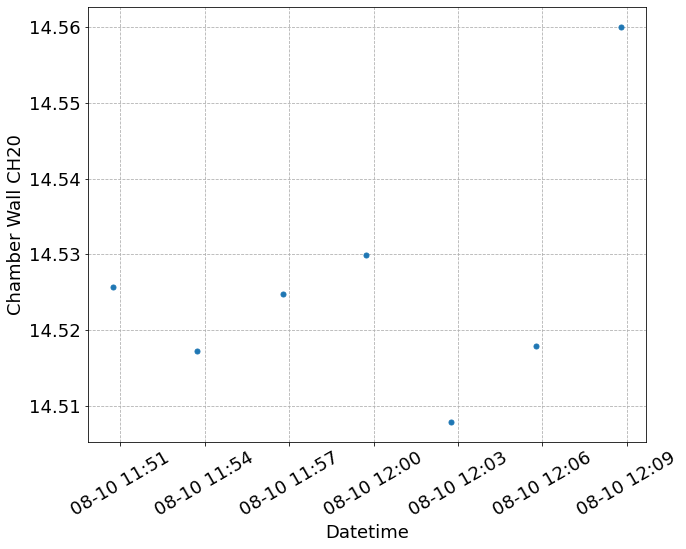

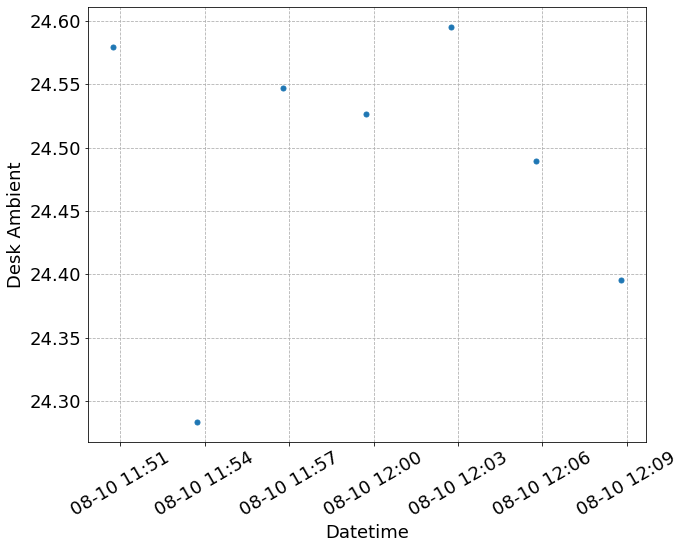

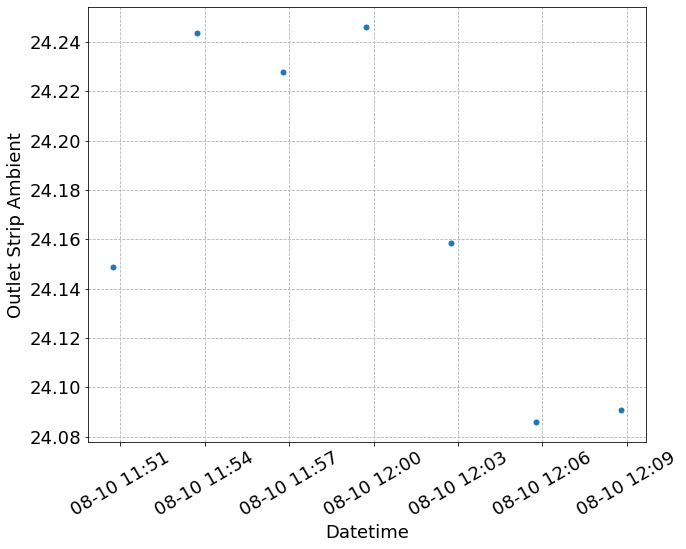

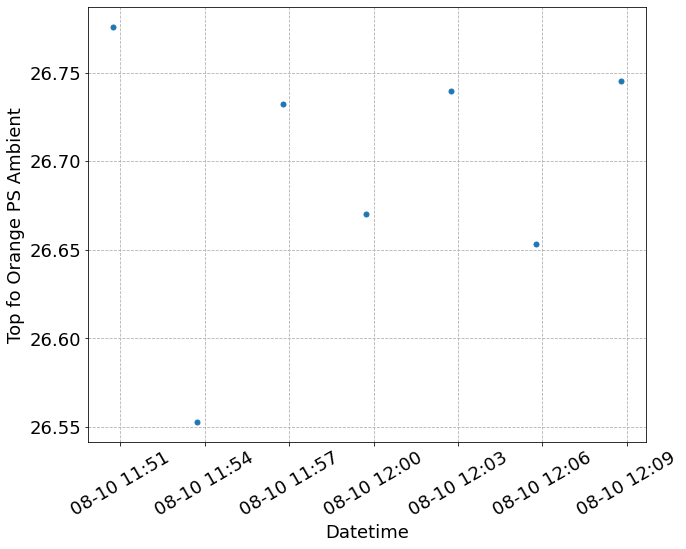

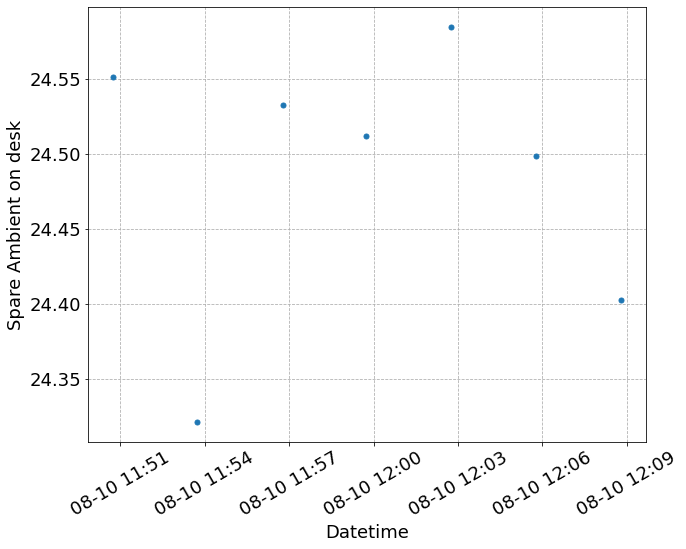

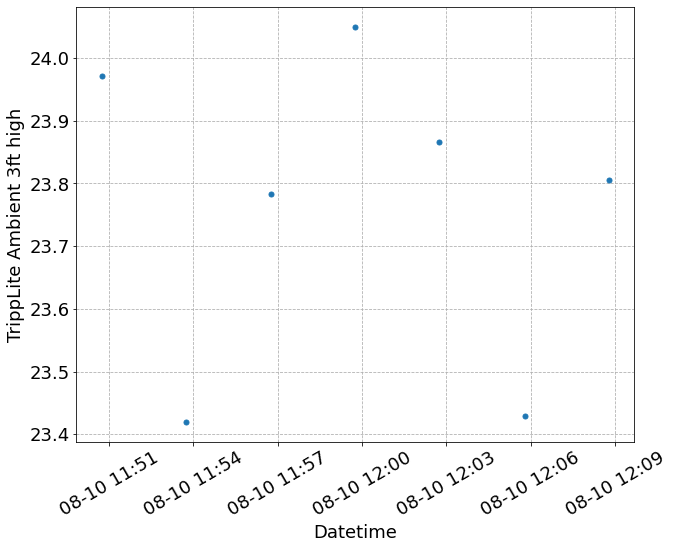

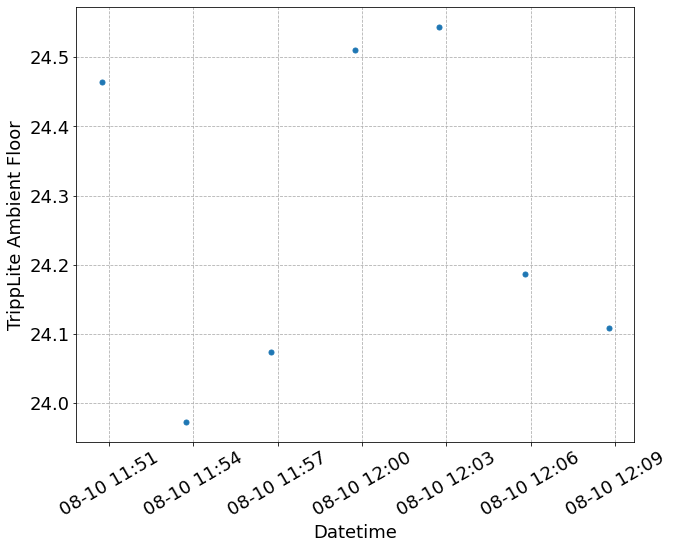

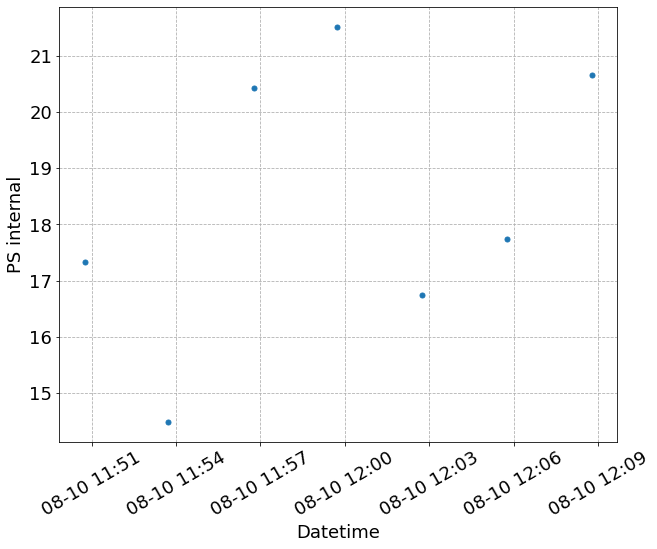

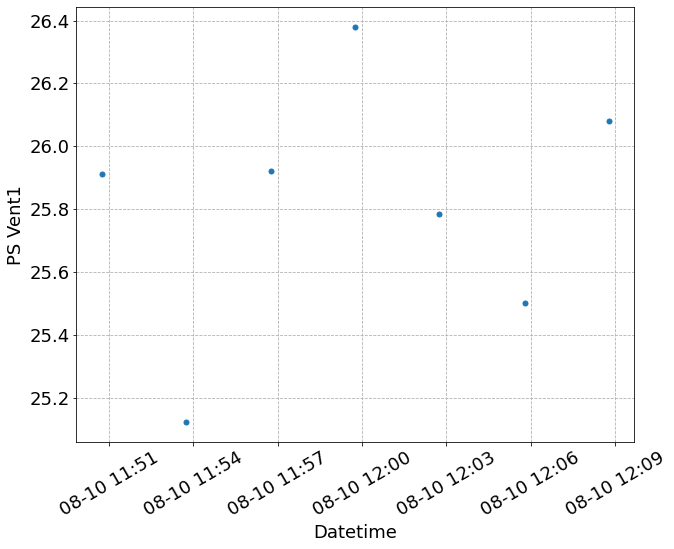

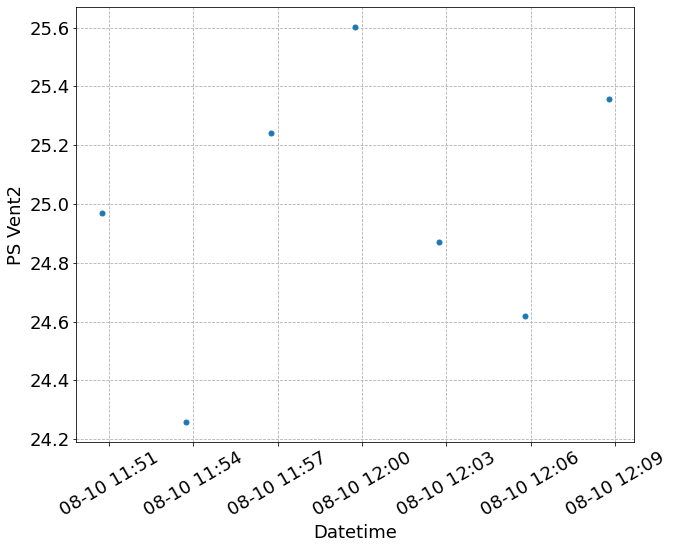

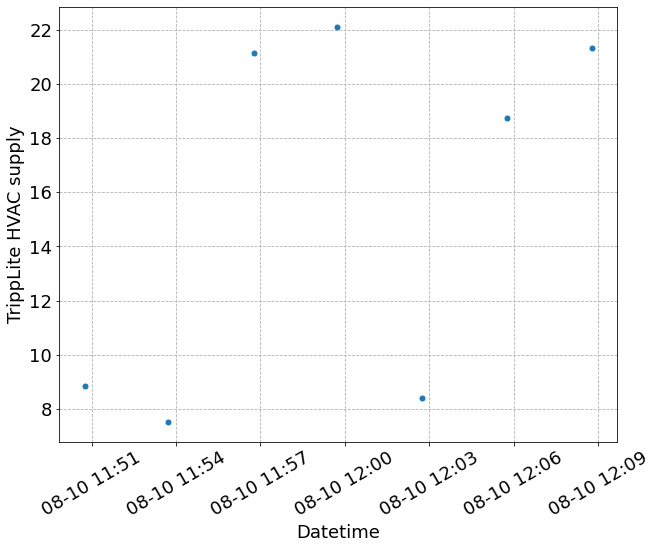

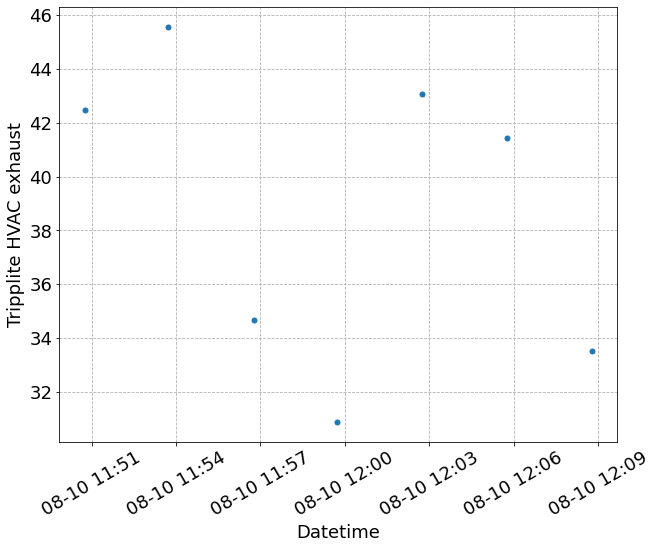

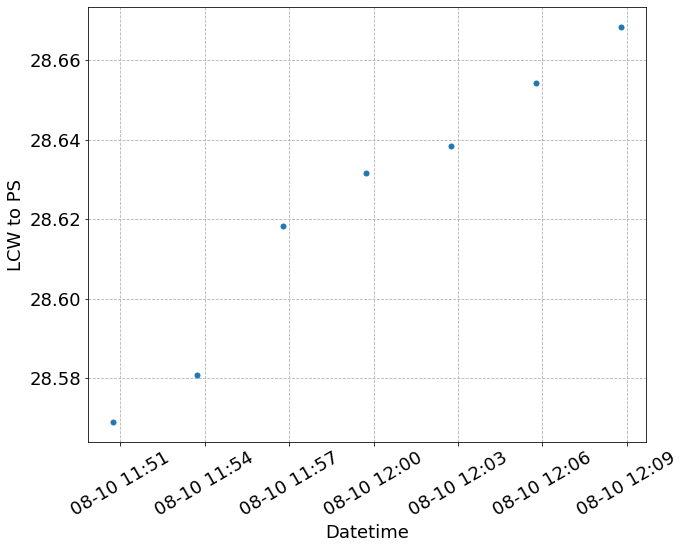

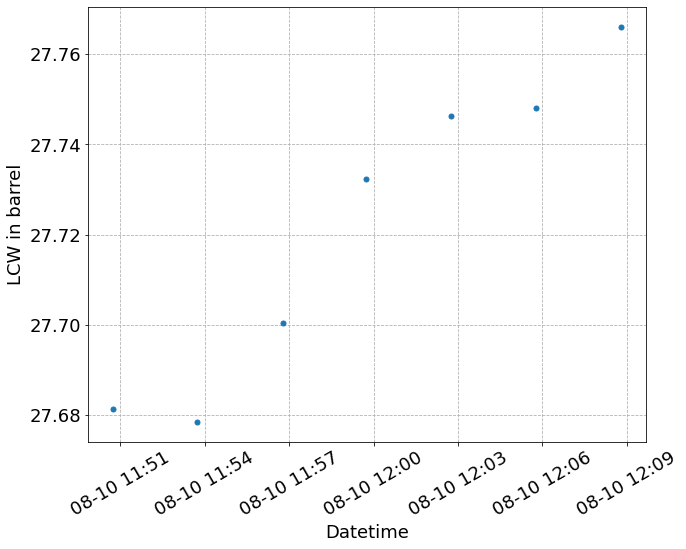

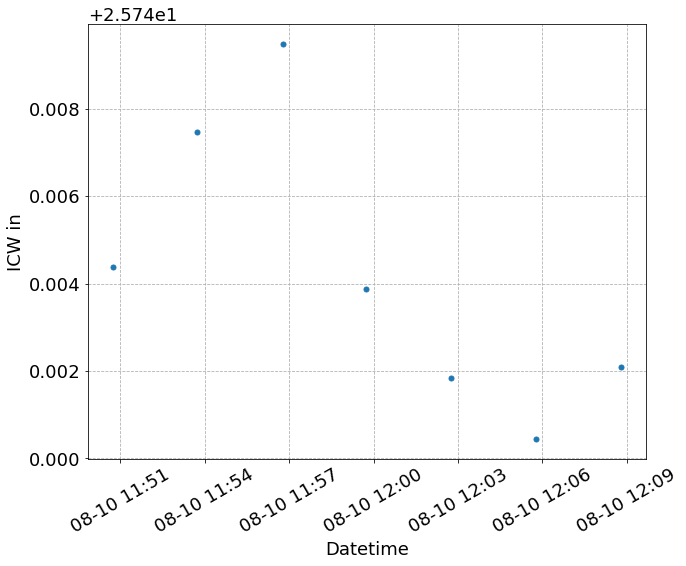

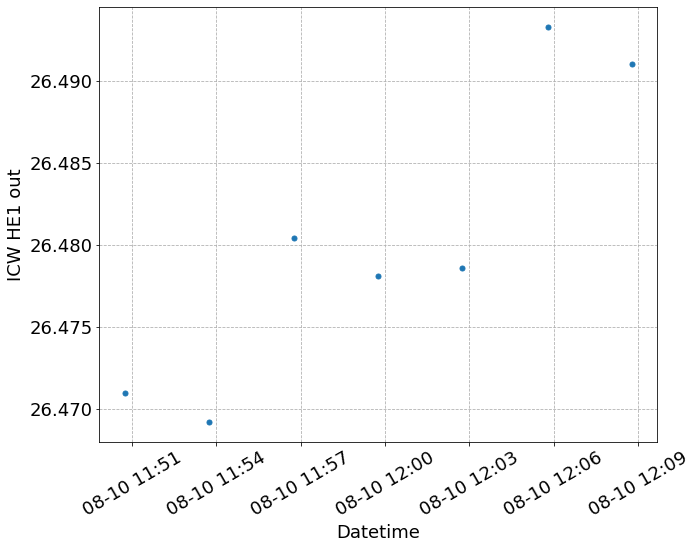

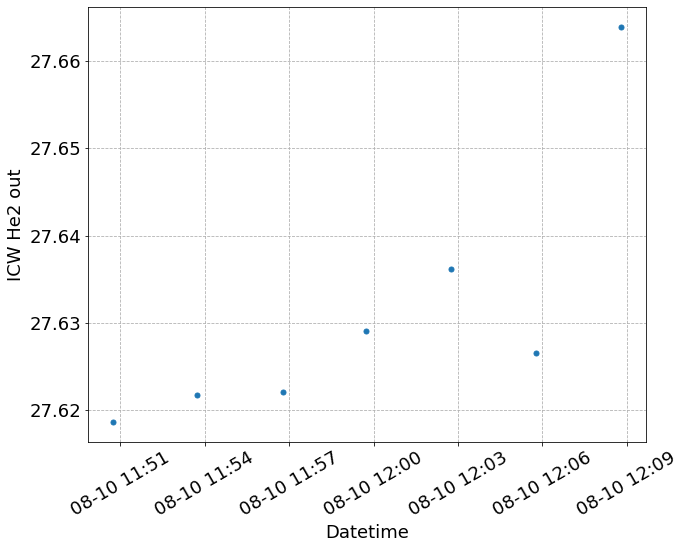

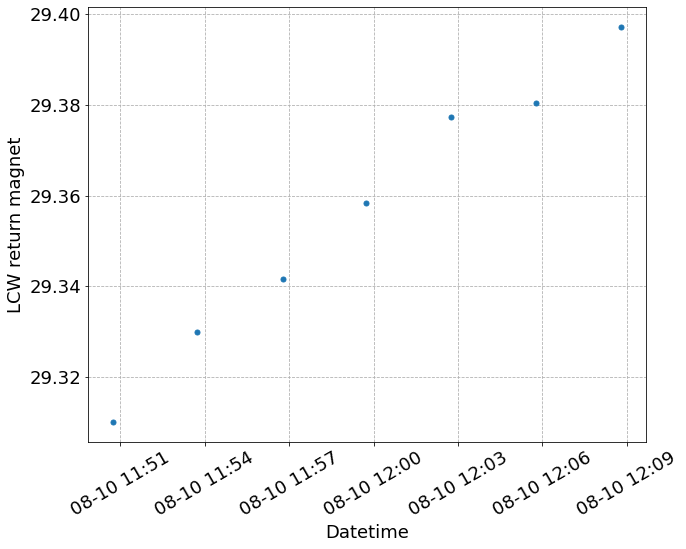

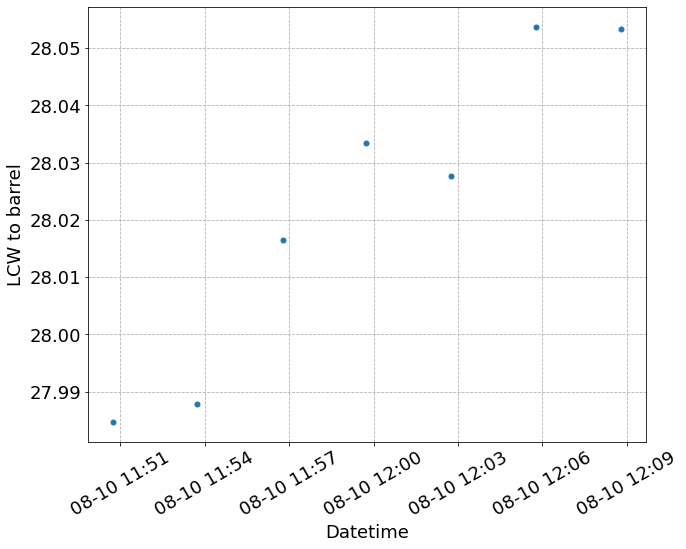

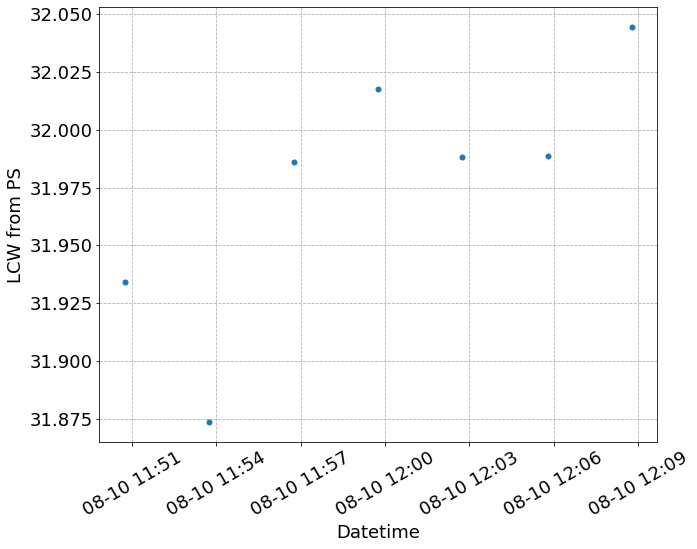

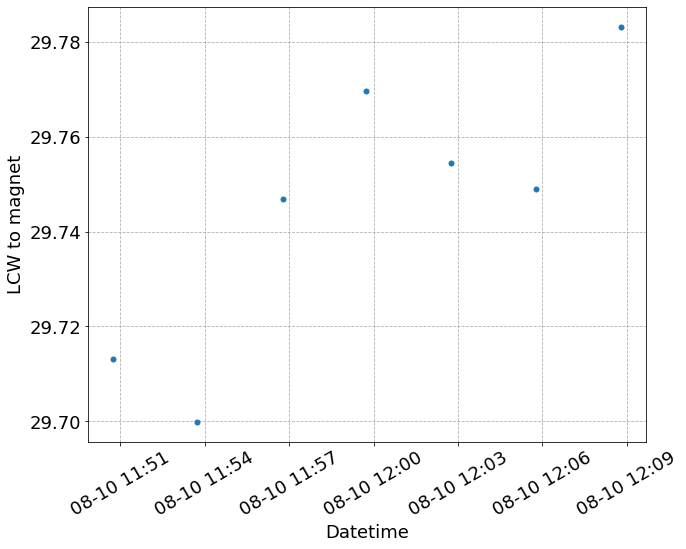

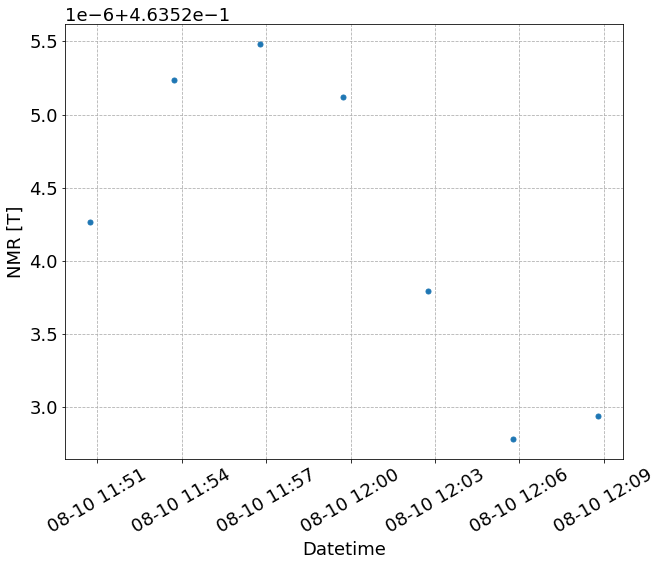

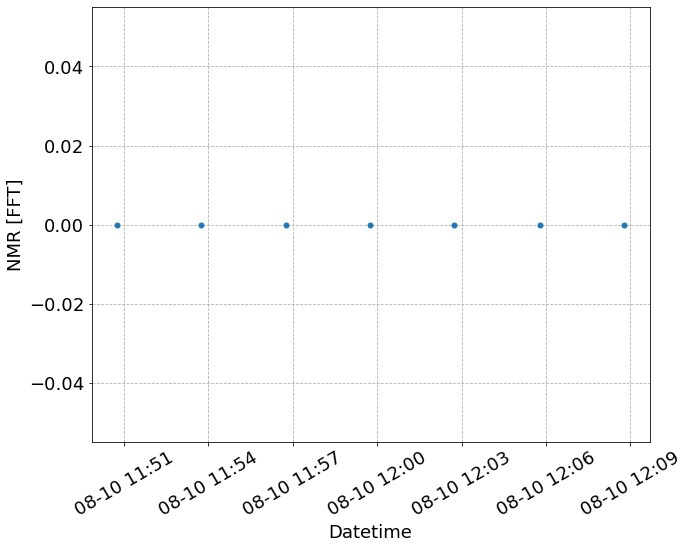

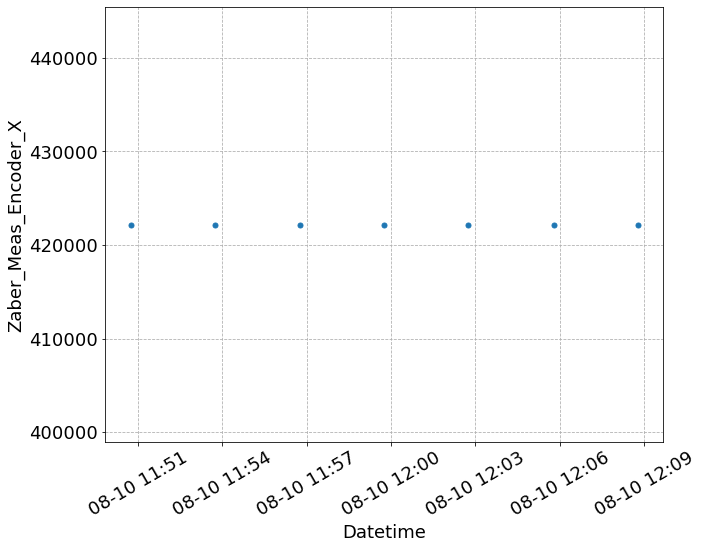

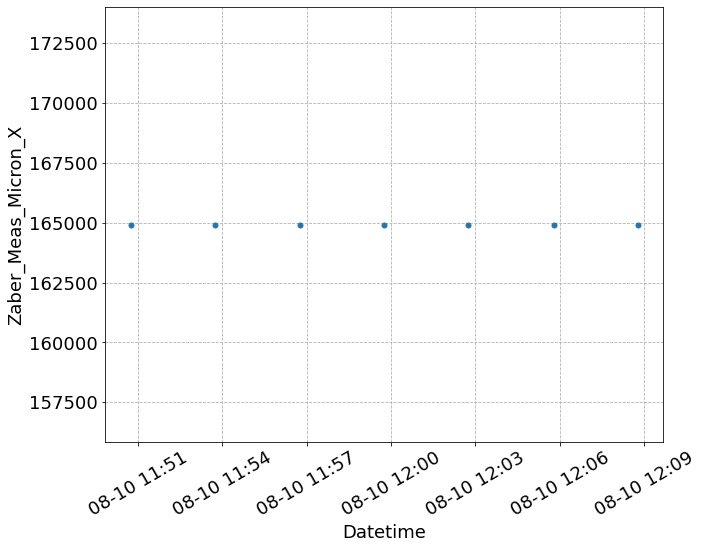

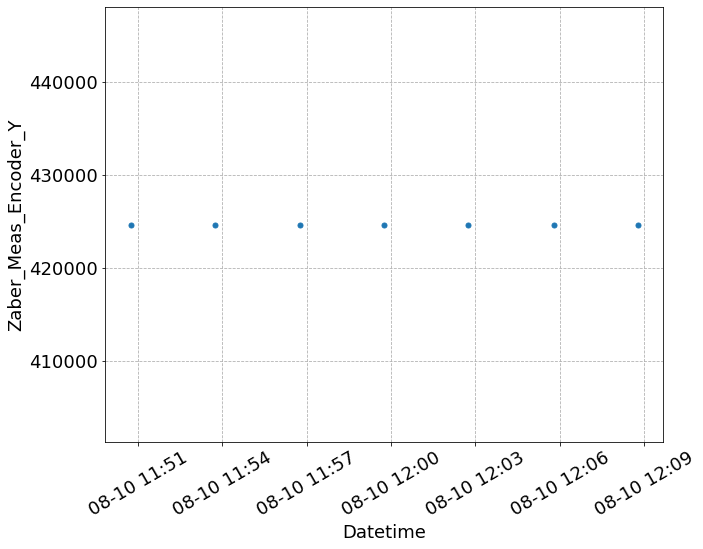

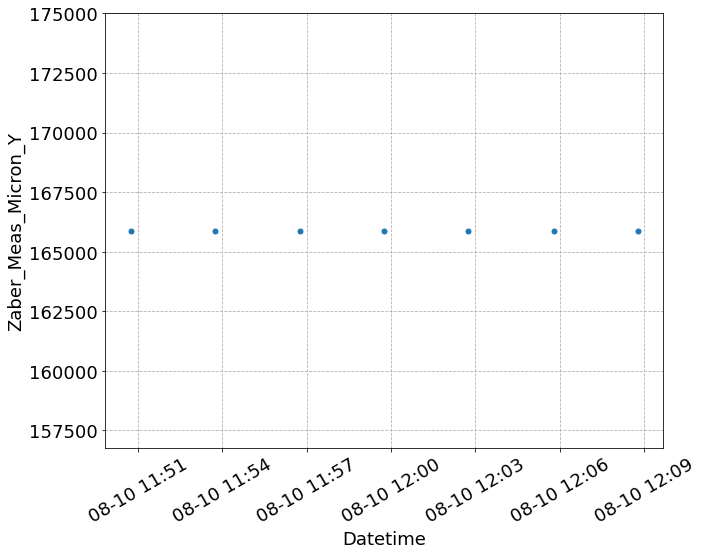

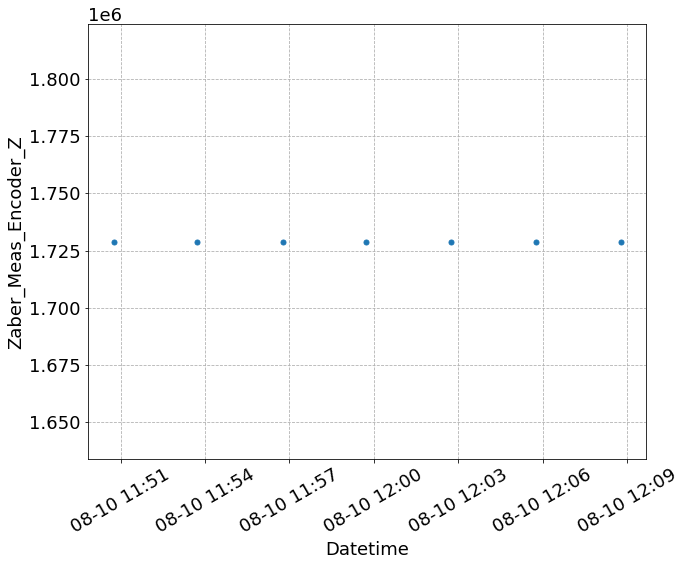

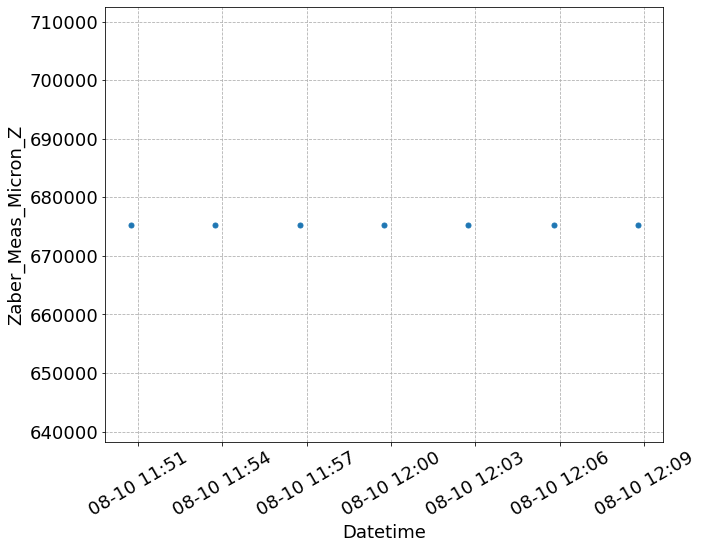

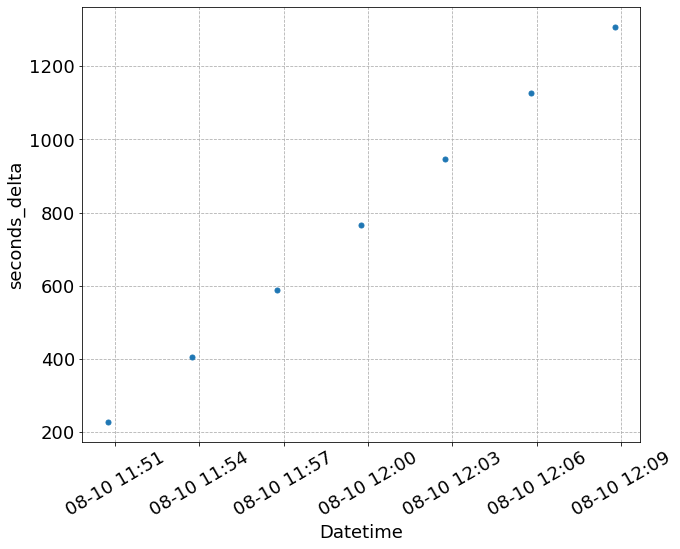

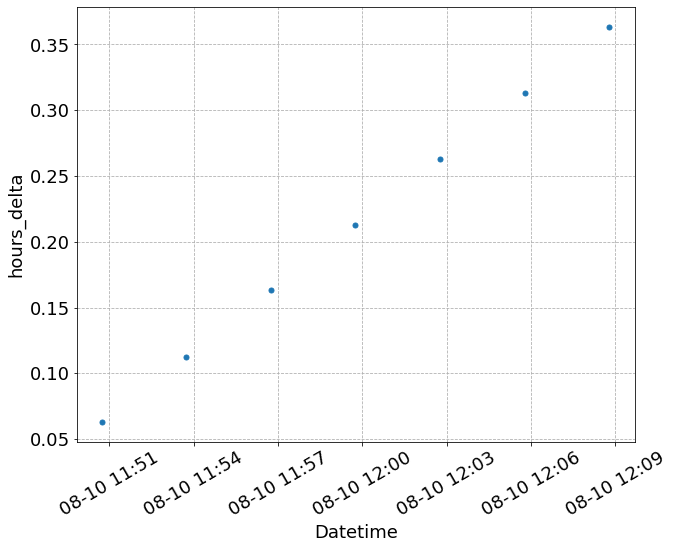

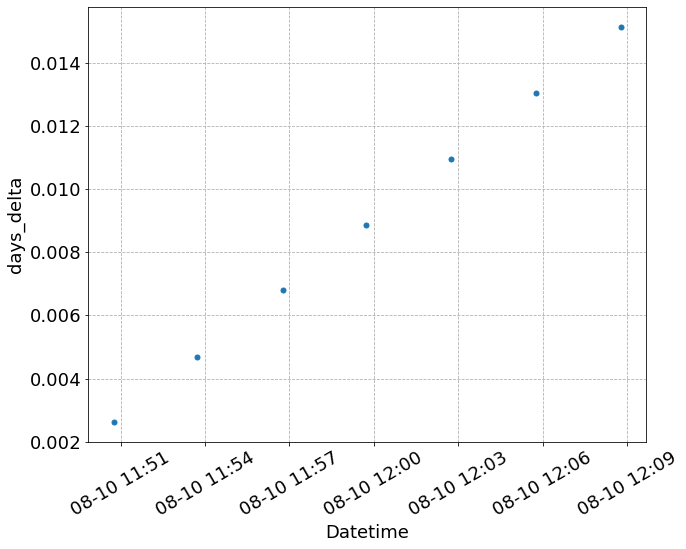

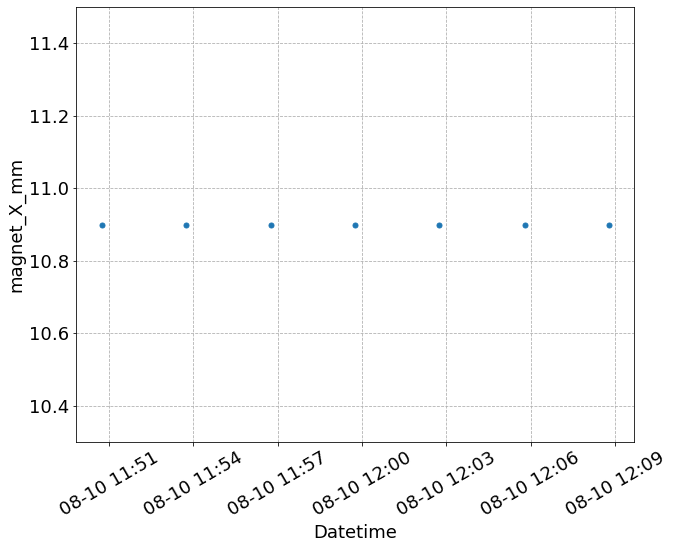

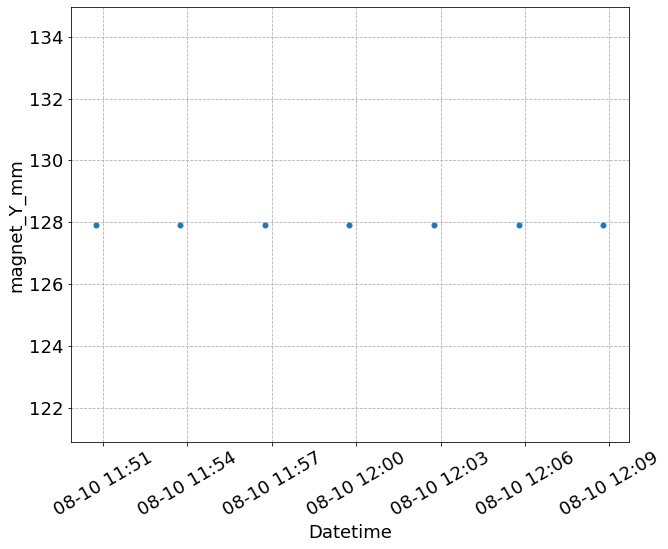

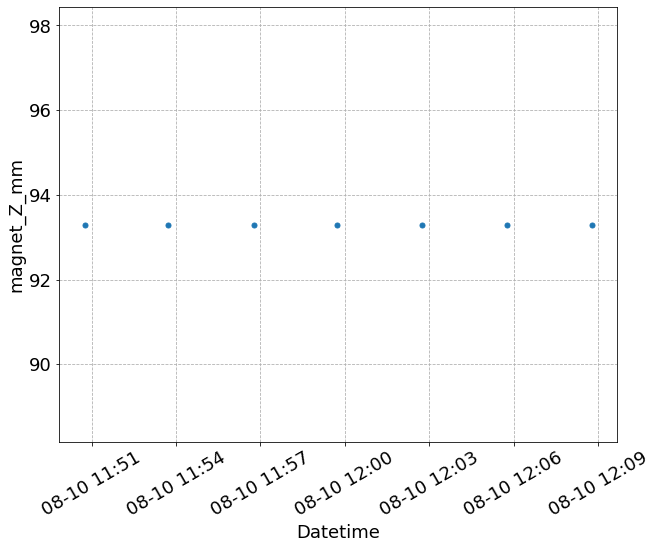

In [93]:
# plot vs. time
for col in df_temp_.columns:
    if is_numeric_dtype(df_temp_[col]):
        fig, ax = plt.subplots()
        ax = datetime_plt(ax, df_temp_.index, df_temp_[col], nmaj=6, Locator='Minute')
        ax.set_xlabel('Datetime')
        ax.set_ylabel(col)

In [94]:
# looking at angles in HP and SmarAct

In [95]:
a1 = df_['SmarAct_Meas_Angle_1'].values * np.pi / 180.
a2 = df_['SmarAct_Meas_Angle_2'].values * np.pi / 180.

In [96]:
r_th = df_[f'{probe}_Raw_Theta'].values
r_ph = df_[f'{probe}_Raw_Phi'].values
c_th = df_[f'{probe}_Cal_Theta'].values
c_ph = df_[f'{probe}_Cal_Phi'].values

In [97]:
len(a1), len(r_th)

(136, 136)

In [98]:
# raw

In [99]:
df_[f'{probe}_Raw_Theta'].describe()

count    136.000000
mean       3.073953
std        0.037728
min        2.999453
25%        3.044058
50%        3.074042
75%        3.105439
max        3.138085
Name: 2F0000000D5EC73A_Raw_Theta, dtype: float64

In [100]:
df_[f'{probe}_Raw_Theta'].max() - df_[f'{probe}_Raw_Theta'].min()

0.13863253470030168

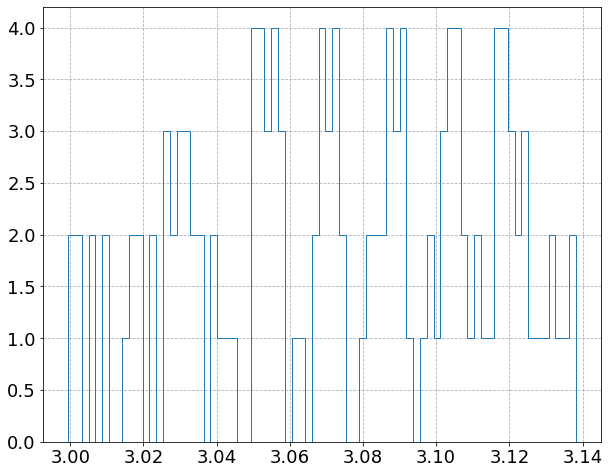

In [101]:
fig, ax = plt.subplots()
ax.hist(df_[f'{probe}_Raw_Theta'], bins=75, histtype='step');

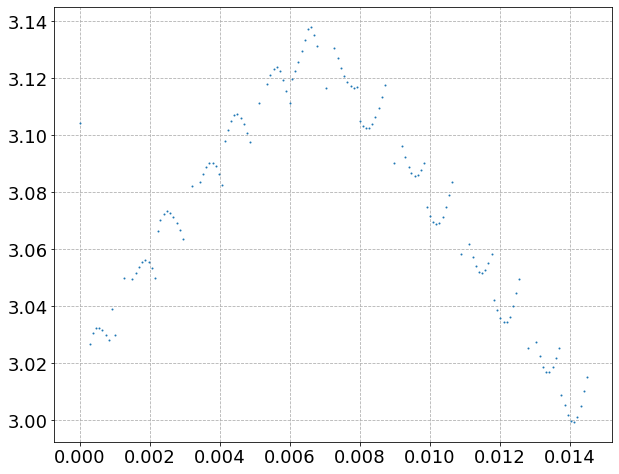

In [102]:
fig, ax = plt.subplots()
#ax.hist(df_[f'{probe}_Raw_Theta'], bins=75, histtype='step');
ax.scatter(df_['days_delta'], df_[f'{probe}_Raw_Theta'], s=1);

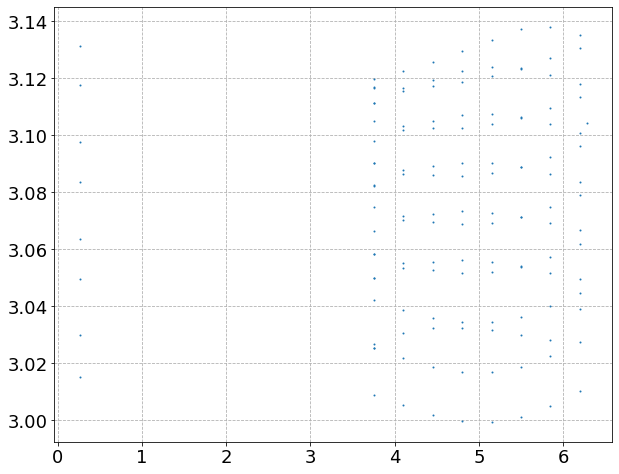

In [103]:
fig, ax = plt.subplots()
# ax.scatter(a1, r_th, s=1);
ax.scatter(a2, r_th, s=1);

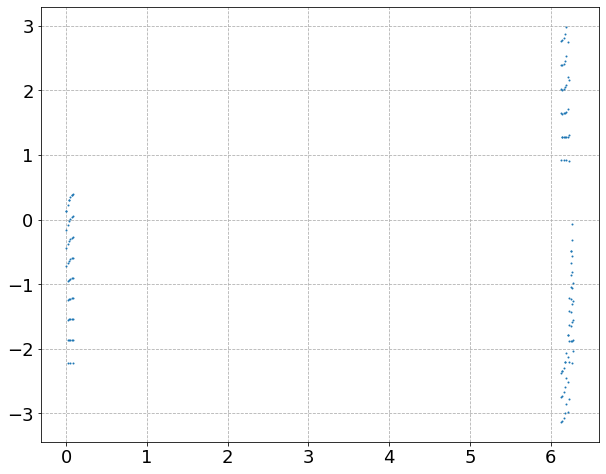

In [104]:
fig, ax = plt.subplots()
#ax.scatter(a2, r_ph, s=1);
ax.scatter(a1, r_ph, s=1);

In [105]:
# cal

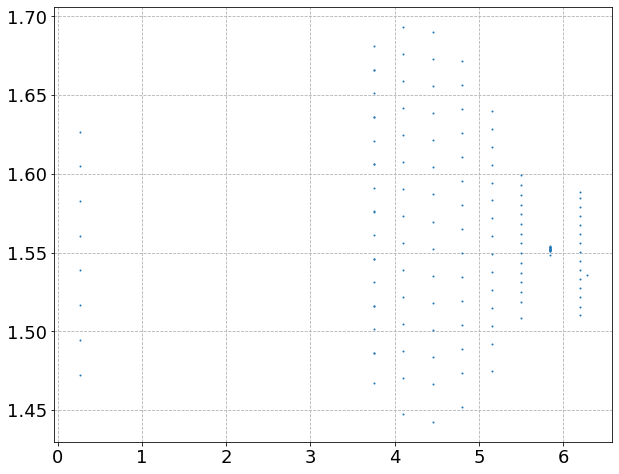

In [106]:
fig, ax = plt.subplots()
# ax.scatter(a1, c_th, s=1);
ax.scatter(a2, c_th, s=1);

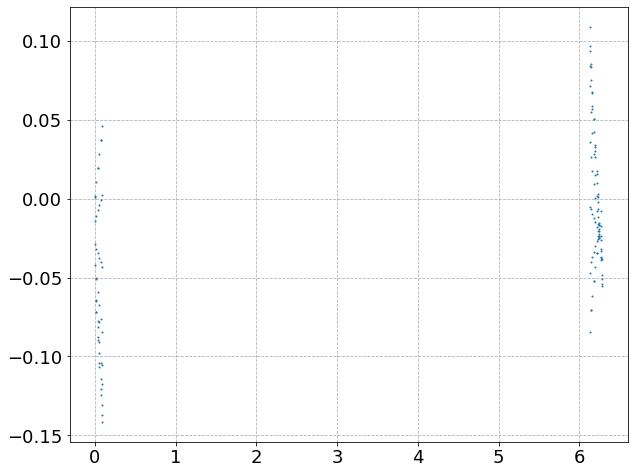

In [107]:
fig, ax = plt.subplots()
# ax.scatter(a2, c_ph, s=1);
ax.scatter(a1, c_ph, s=1);

## Determine Probe Numbers

In [112]:
(df_ == df).all().all()

True

## Probe on "left" of glass cube (V_2 = Raw_y)

In [125]:
# HP "vertical", small end pointed towards ceiling

In [116]:
360 - 25

335

In [115]:
df['SmarAct_Meas_Angle_2'].unique()

array([359.999594, 214.999972, 234.999993, 255.000016, 275.000009,
       295.000005, 315.000013, 335.000017, 355.000143,  15.000019,
       214.999978, 355.000008, 334.999996, 314.999979, 295.000012,
       274.999986, 254.99996 , 234.999967, 214.999975, 214.999995,
       235.000017, 255.000013, 275.000008, 295.000018, 315.000024,
       335.00001 , 355.000031,  15.000006, 355.000007, 334.999939,
       314.999983, 294.999966, 274.999977, 254.999961, 234.999964,
       214.999953, 214.999996, 235.00001 , 255.000021, 295.000014,
       315.000014, 355.000012,  14.999998, 214.999968, 355.000015,
       334.999992, 314.999993, 295.000006, 274.999973, 254.999963,
       234.999987, 214.999991, 234.999997, 255.000012, 275.000017,
       315.000005, 335.000006, 355.      ,  15.000012, 214.999955,
       354.999995, 334.999999, 314.99998 , 295.000027, 274.999975,
       254.999981, 234.999975, 214.999944, 235.000002, 255.000008,
       295.000016, 335.000011,  15.000011, 214.999981, 355.000

In [144]:
df_line = df[np.isclose(df['SmarAct_Meas_Angle_2'], 335., atol=1e-2, rtol=1e-2)]

In [145]:
df_line

Time  Magnet Current [V]  \
Datetime                                                         
2021-08-10 11:49:42  8/10/2021 11:49:42 AM                 0.0   
2021-08-10 11:50:48  8/10/2021 11:50:48 AM                 0.0   
2021-08-10 11:52:29  8/10/2021 11:52:29 AM                 0.0   
2021-08-10 11:53:34  8/10/2021 11:53:34 AM                 0.0   
2021-08-10 11:55:15  8/10/2021 11:55:15 AM                 0.0   
2021-08-10 11:56:21  8/10/2021 11:56:21 AM                 0.0   
2021-08-10 11:58:02  8/10/2021 11:58:02 AM                 0.0   
2021-08-10 11:59:07  8/10/2021 11:59:07 AM                 0.0   
2021-08-10 12:00:48  8/10/2021 12:00:48 PM                 0.0   
2021-08-10 12:01:53  8/10/2021 12:01:53 PM                 0.0   
2021-08-10 12:03:34  8/10/2021 12:03:34 PM                 0.0   
2021-08-10 12:04:40  8/10/2021 12:04:40 PM                 0.0   
2021-08-10 12:06:20  8/10/2021 12:06:20 PM                 0.0   
2021-08-10 12:07:26  8/10/2021 12:07:26 PM                 0.0   
2021-08-10 12:09:07  8/10/2021 12:09:07 PM                 0.0   

                     Magnet Voltage [V]  NMR [T]  NMR [FFT]  \
Datetime                                                      
2021-08-10 11:49:42                 0.0      0.0        0.0   
2021-08-10 11:50:48                 0.0      0.0        0.0   
2021-08-10 11:52:29                 0.0      0.0        0.0   
2021-08-10 11:53:34                 0.0      0.0        0.0   
2021-08-10 11:55:15                 0.0      0.0        0.0   
2021-08-10 11:56:21                 0.0      0.0        0.0   
2021-08-10 11:58:02                 0.0      0.0        0.0   
2021-08-10 11:59:07                 0.0      0.0        0.0   
2021-08-10 12:00:48                 0.0      0.0        0.0   
2021-08-10 12:01:53                 0.0      0.0        0.0   
2021-08-10 12:03:34                 0.0      0.0        0.0   
2021-08-10 12:04:40                 0.0      0.0        0.0   
2021-08-10 12:06:20                 0.0      0.0        0.0   
2021-08-10 12:07:26                 0.0      0.0        0.0   
2021-08-10 12:09:07                 0.0      0.0        0.0   

                     2F0000000D5EC73A_Raw_X  2F0000000D5EC73A_Raw_Y  \
Datetime                                                              
2021-08-10 11:49:42                -12420.0                145063.0   
2021-08-10 11:50:48                 -7944.0                114970.0   
2021-08-10 11:52:29                 -6924.0                 92728.0   
2021-08-10 11:53:34                 -5792.0                 70512.0   
2021-08-10 11:55:15                 -4773.0                 48318.0   
2021-08-10 11:56:21                 -3579.0                 26069.0   
2021-08-10 11:58:02                 -2494.0                  3749.0   
2021-08-10 11:59:07                 -1427.0                -18624.0   
2021-08-10 12:00:48                  -254.0                -40955.0   
2021-08-10 12:01:53                   837.0                -63210.0   
2021-08-10 12:03:34                  1936.0                -85384.0   
2021-08-10 12:04:40                  2993.0               -107752.0   
2021-08-10 12:06:20                  4133.0               -129691.0   
2021-08-10 12:07:26                  5155.0               -152094.0   
2021-08-10 12:09:07                  6254.0               -174042.0   

                     2F0000000D5EC73A_Raw_Z  2F0000000D5EC73A_Raw_T  \
Datetime                                                              
2021-08-10 11:49:42              -1278196.0                 17412.0   
2021-08-10 11:50:48              -1280911.0                 17449.0   
2021-08-10 11:52:29              -1282299.0                 17478.0   
2021-08-10 11:53:34              -1283276.0                 17464.0   
2021-08-10 11:55:15              -1283838.0                 17510.0   
2021-08-10 11:56:21              -1284083.0                 17456.0   
2021-08-10 11:58:02              -1283853.0                 17491.0

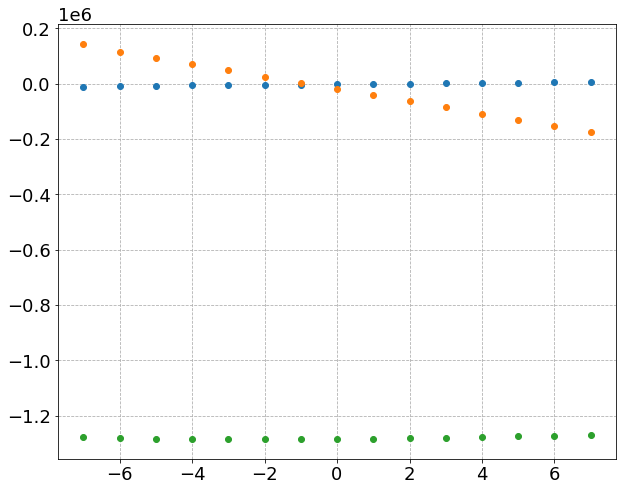

In [146]:
fig, ax = plt.subplots()

# ax.scatter(df_line['SmarAct_Meas_Angle_1'], df_line[''])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_X'])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_Y'])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_Z'])

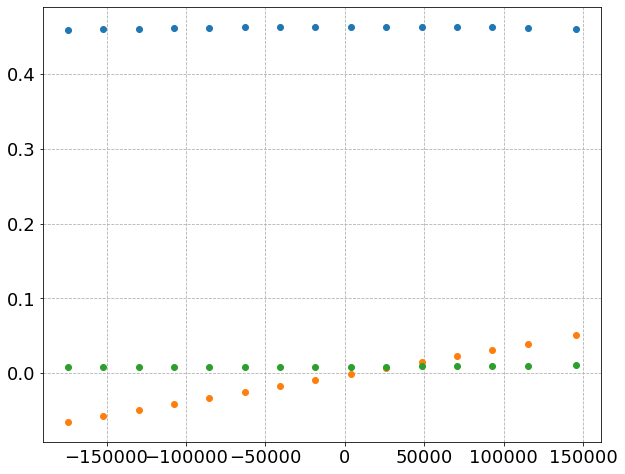

In [148]:
fig, ax = plt.subplots()

# ax.scatter(df_line['SmarAct_Meas_Angle_1'], df_line[''])
ax.scatter(df_line[f'{probe}_Raw_Y'], df_line[f'{probe}_Cal_X'])
ax.scatter(df_line[f'{probe}_Raw_Y'], df_line[f'{probe}_Cal_Y'])
ax.scatter(df_line[f'{probe}_Raw_Y'], df_line[f'{probe}_Cal_Z'])

In [130]:
# HP "horizontal", small end toward "right" (aka Zaber base)
# note don't have exact rotation, within 10 degrees on either end

In [131]:
360 - 25 - 90

245

In [132]:
#(360 - 25 + 90) % 360

In [115]:
df['SmarAct_Meas_Angle_2'].unique()

array([359.999594, 214.999972, 234.999993, 255.000016, 275.000009,
       295.000005, 315.000013, 335.000017, 355.000143,  15.000019,
       214.999978, 355.000008, 334.999996, 314.999979, 295.000012,
       274.999986, 254.99996 , 234.999967, 214.999975, 214.999995,
       235.000017, 255.000013, 275.000008, 295.000018, 315.000024,
       335.00001 , 355.000031,  15.000006, 355.000007, 334.999939,
       314.999983, 294.999966, 274.999977, 254.999961, 234.999964,
       214.999953, 214.999996, 235.00001 , 255.000021, 295.000014,
       315.000014, 355.000012,  14.999998, 214.999968, 355.000015,
       334.999992, 314.999993, 295.000006, 274.999973, 254.999963,
       234.999987, 214.999991, 234.999997, 255.000012, 275.000017,
       315.000005, 335.000006, 355.      ,  15.000012, 214.999955,
       354.999995, 334.999999, 314.99998 , 295.000027, 274.999975,
       254.999981, 234.999975, 214.999944, 235.000002, 255.000008,
       295.000016, 335.000011,  15.000011, 214.999981, 355.000

In [149]:
df_line = df[np.isclose(df['SmarAct_Meas_Angle_2'], 255., atol=1e-2, rtol=1e-2)]

In [150]:
df_line

Time  Magnet Current [V]  \
Datetime                                                         
2021-08-10 11:49:10  8/10/2021 11:49:10 AM                 0.0   
2021-08-10 11:51:20  8/10/2021 11:51:20 AM                 0.0   
2021-08-10 11:51:57  8/10/2021 11:51:57 AM                 0.0   
2021-08-10 11:54:06  8/10/2021 11:54:06 AM                 0.0   
2021-08-10 11:54:44  8/10/2021 11:54:44 AM                 0.0   
2021-08-10 11:56:52  8/10/2021 11:56:52 AM                 0.0   
2021-08-10 11:57:30  8/10/2021 11:57:30 AM                 0.0   
2021-08-10 11:59:39  8/10/2021 11:59:39 AM                 0.0   
2021-08-10 12:00:17  8/10/2021 12:00:17 PM                 0.0   
2021-08-10 12:02:25  8/10/2021 12:02:25 PM                 0.0   
2021-08-10 12:03:03  8/10/2021 12:03:03 PM                 0.0   
2021-08-10 12:05:11  8/10/2021 12:05:11 PM                 0.0   
2021-08-10 12:05:49  8/10/2021 12:05:49 PM                 0.0   
2021-08-10 12:07:58  8/10/2021 12:07:58 PM                 0.0   
2021-08-10 12:08:35  8/10/2021 12:08:35 PM                 0.0   

                     Magnet Voltage [V]  NMR [T]  NMR [FFT]  \
Datetime                                                      
2021-08-10 11:49:10                 0.0      0.0        0.0   
2021-08-10 11:51:20                 0.0      0.0        0.0   
2021-08-10 11:51:57                 0.0      0.0        0.0   
2021-08-10 11:54:06                 0.0      0.0        0.0   
2021-08-10 11:54:44                 0.0      0.0        0.0   
2021-08-10 11:56:52                 0.0      0.0        0.0   
2021-08-10 11:57:30                 0.0      0.0        0.0   
2021-08-10 11:59:39                 0.0      0.0        0.0   
2021-08-10 12:00:17                 0.0      0.0        0.0   
2021-08-10 12:02:25                 0.0      0.0        0.0   
2021-08-10 12:03:03                 0.0      0.0        0.0   
2021-08-10 12:05:11                 0.0      0.0        0.0   
2021-08-10 12:05:49                 0.0      0.0        0.0   
2021-08-10 12:07:58                 0.0      0.0        0.0   
2021-08-10 12:08:35                 0.0      0.0        0.0   

                     2F0000000D5EC73A_Raw_X  2F0000000D5EC73A_Raw_Y  \
Datetime                                                              
2021-08-10 11:49:10               -139826.0                 -1174.0   
2021-08-10 11:51:20               -109934.0                 -2997.0   
2021-08-10 11:51:57                -88263.0                 -6419.0   
2021-08-10 11:54:06                -66545.0                 -9850.0   
2021-08-10 11:54:44                -44770.0                -13293.0   
2021-08-10 11:56:52                -23021.0                -16793.0   
2021-08-10 11:57:30                 -1160.0                -20175.0   
2021-08-10 11:59:39                 20567.0                -23602.0   
2021-08-10 12:00:17                 42385.0                -27044.0   
2021-08-10 12:02:25                 64193.0                -30410.0   
2021-08-10 12:03:03                 85810.0                -33939.0   
2021-08-10 12:05:11                107461.0                -37365.0   
2021-08-10 12:05:49                129206.0                -40699.0   
2021-08-10 12:07:58                150842.0                -44177.0   
2021-08-10 12:08:35                172381.0                -47448.0   

                     2F0000000D5EC73A_Raw_Z  2F0000000D5EC73A_Raw_T  \
Datetime                                                              
2021-08-10 11:49:10              -1274535.0                 17399.0   
2021-08-10 11:51:20              -1277615.0                 17539.0   
2021-08-10 11:51:57              -1279604.0                 17588.0   
2021-08-10 11:54:06              -1281034.0                 17560.0   
2021-08-10 11:54:44              -1282222.0                 17600.0   
2021-08-10 11:56:52              -1282897.0                 17537.0   
2021-08-10 11:57:30              -1283247.0                 17594.0

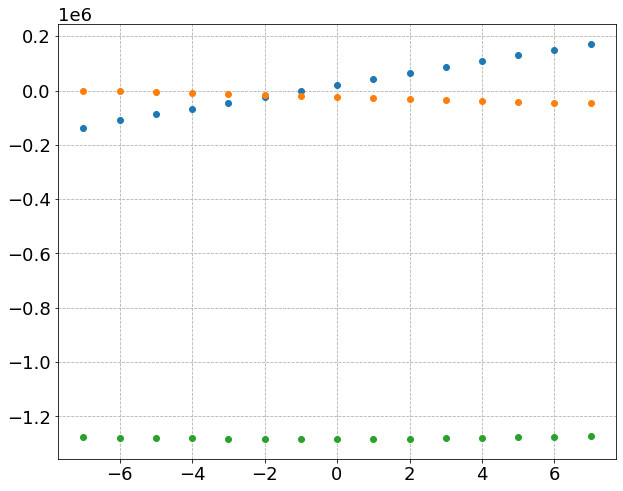

In [151]:
fig, ax = plt.subplots()

# ax.scatter(df_line['SmarAct_Meas_Angle_1'], df_line[''])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_X'])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_Y'])
ax.scatter(df_line['SmarAct_Pattern_Angle_1'], df_line[f'{probe}_Raw_Z'])

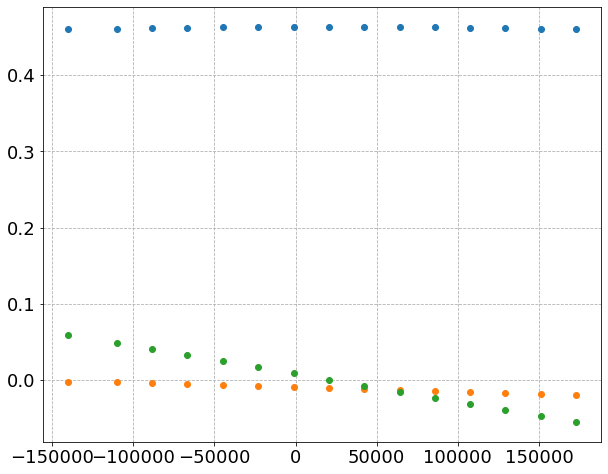

In [152]:
fig, ax = plt.subplots()

# ax.scatter(df_line['SmarAct_Meas_Angle_1'], df_line[''])
ax.scatter(df_line[f'{probe}_Raw_X'], df_line[f'{probe}_Cal_X'])
ax.scatter(df_line[f'{probe}_Raw_X'], df_line[f'{probe}_Cal_Y'])
ax.scatter(df_line[f'{probe}_Raw_X'], df_line[f'{probe}_Cal_Z'])

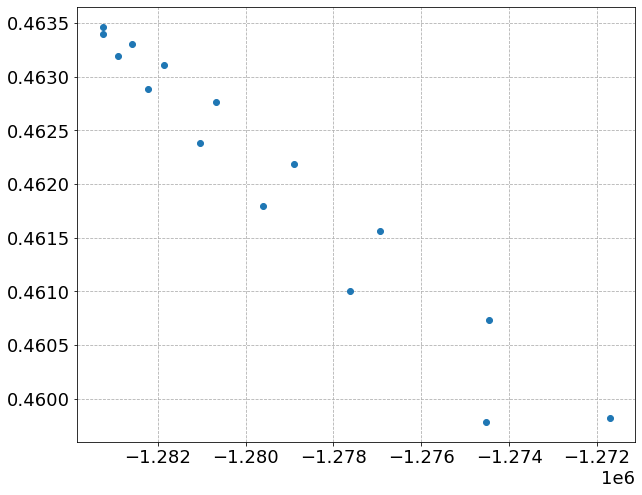

In [154]:
fig, ax = plt.subplots()

# ax.scatter(df_line['SmarAct_Meas_Angle_1'], df_line[''])
ax.scatter(df_line[f'{probe}_Raw_Z'], df_line[f'{probe}_Cal_X'])
# ax.scatter(df_line[f'{probe}_Raw_Z'], df_line[f'{probe}_Cal_Y'])
# ax.scatter(df_line[f'{probe}_Raw_Z'], df_line[f'{probe}_Cal_Z'])

# Positions
- Match up with labels "H1", "H2", "H3" on pictures of green Hall probe card
- "H1" -> "Raw_X", etc.

- Mapping:
    - Raw Z --> -B_z (B_z = B_z on Big Propeller)
    - Raw Y --> B_x (B_x = B_phi on Big Propeller)
    - Raw X --> -B_y (B_y = B_r on Big Propeller)
    
- Bergsma (for comparison):
    - Raw Z --> -B_x
    - Raw Y --> B_y
    - Raw X --> -B_z

In [155]:
probe

'2F0000000D5EC73A'

In [136]:
from hallprobecalib.hpcplots import spherical_scatter3d

In [142]:
# fig = spherical_scatter3d(np.radians(df['SmarAct_Meas_Angle_2']), np.radians(df['SmarAct_Meas_Angle_1']), df[f'{probe}_Raw_Z'])
fig = spherical_scatter3d(3*[df['SmarAct_Meas_Angle_2']], 3*[df['SmarAct_Meas_Angle_1']+2.], [df[f'{probe}_Raw_{i}'] for i in ['X', 'Y', 'Z']],
                         colors_list=['Blues', 'Hot', 'Viridis'])

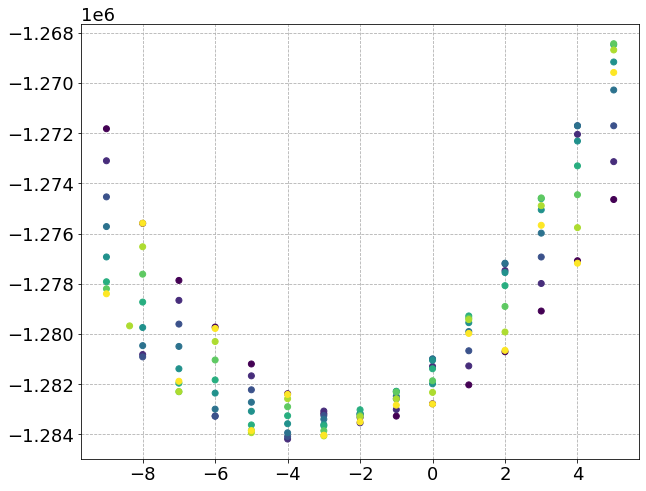

In [224]:
fig, ax = plt.subplots()

a0 = np.radians(df['SmarAct_Meas_Angle_1'])
a0 = np.array([i if i <= np.pi else i-2*np.pi for i in a0])

ax.scatter(np.degrees(a0), df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_2'])

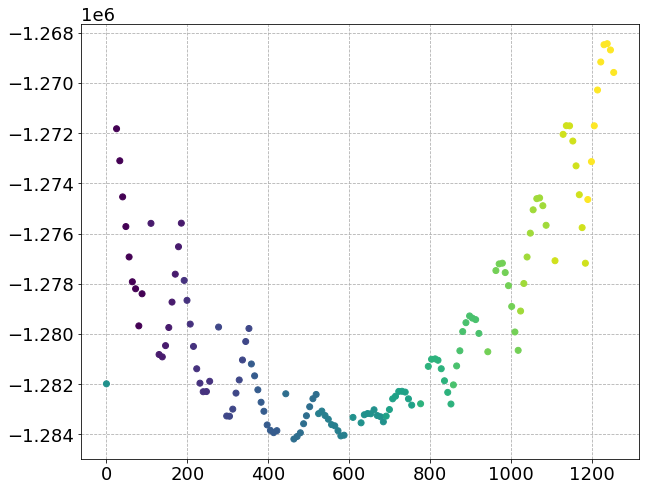

In [160]:
fig, ax = plt.subplots()

ax.scatter(df.seconds_delta, df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_1'])

In [197]:
def quad(theta, **params):
    return params['C_0'] + params['C_1'] * theta + params['C_2'] * theta**2

def mod_cos(theta, **params):
    return params['C_0'] + params['C_1'] * np.cos(params['C_2']*theta + params['C_3'])

In [183]:
a1 = np.radians(df['SmarAct_Meas_Angle_1'])
a1 = np.array([i if i <= np.pi else i-2*np.pi for i in a1])
a2 = np.radians(df['SmarAct_Meas_Angle_2'])
a2 = np.array([i if i <= np.pi else i-2*np.pi for i in a2])
df['a1'] = a1
df['a2'] = a2

In [184]:
df_ = df.sort_values(by='a1')

In [185]:
std_V = 2e-5 * df_[f'{probe}_Raw_Z'].values

In [198]:
# model = lm.Model(quad, independent_vars=['theta'])
model = lm.Model(mod_cos, independent_vars=['theta'])
params = lm.Parameters()
params.add('C_0', value=0, vary=False)
params.add('C_1', value=0, vary=True)
# params.add('C_2', value=0, vary=True)
params.add('C_2', value=1, min=0.1, max=2., vary=False)
params.add('C_3', value=0., min=-np.pi, max=np.pi, vary=True)
result = model.fit(df_[f'{probe}_Raw_Z'].values, theta=df_['a1'].values, params=params, weights=1/std_V)

In [199]:
result

In [200]:
np.degrees(result.params['C_3'])

3.0396260339117216

(<Figure size 720x720 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

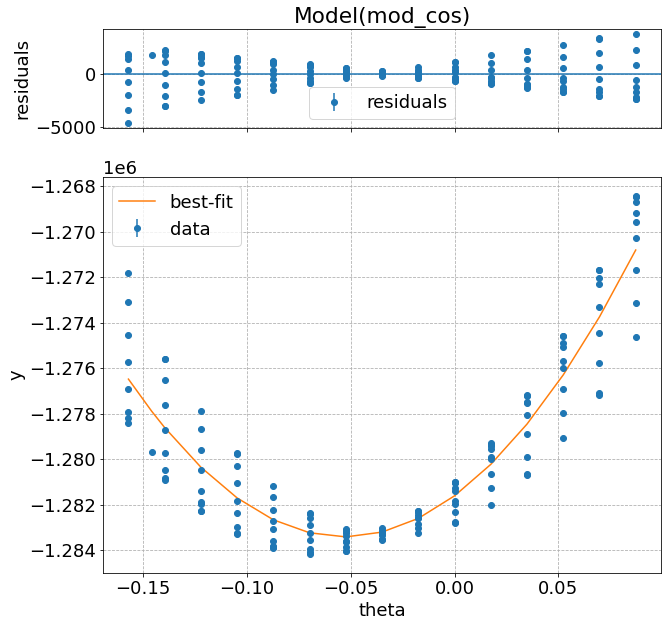

In [201]:
result.plot()

In [161]:
lm

<module 'lmfit' from '/home/ckampa/anaconda3/envs/mu2e/lib/python3.8/site-packages/lmfit/__init__.py'>

In [203]:
res = result.residual

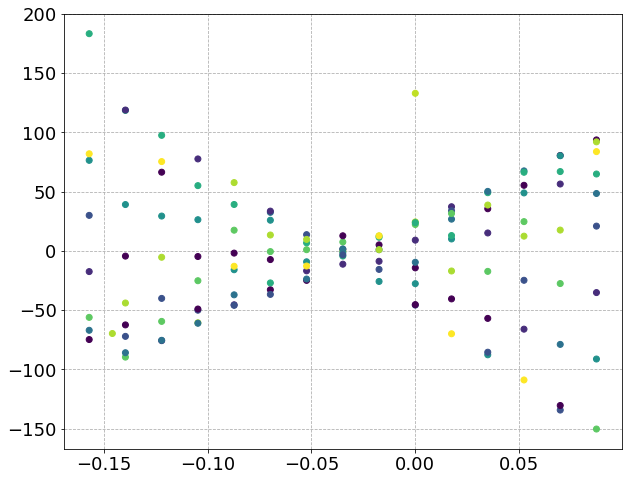

In [209]:
fig, ax = plt.subplots()

#ax.scatter(df.seconds_delta, df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_1'])
ax.scatter(df.a1, res, c=df.a2)

In [210]:
res / df[f'{probe}_Raw_Z']

Datetime
2021-08-10 11:48:30   -0.000104
2021-08-10 11:48:55    0.000059
2021-08-10 11:49:03    0.000014
2021-08-10 11:49:10   -0.000024
2021-08-10 11:49:18    0.000053
                         ...   
2021-08-10 12:08:51    0.000072
2021-08-10 12:08:59   -0.000051
2021-08-10 12:09:07    0.000119
2021-08-10 12:09:15   -0.000073
2021-08-10 12:09:23   -0.000066
Name: 2F0000000D5EC73A_Raw_Z, Length: 136, dtype: float64

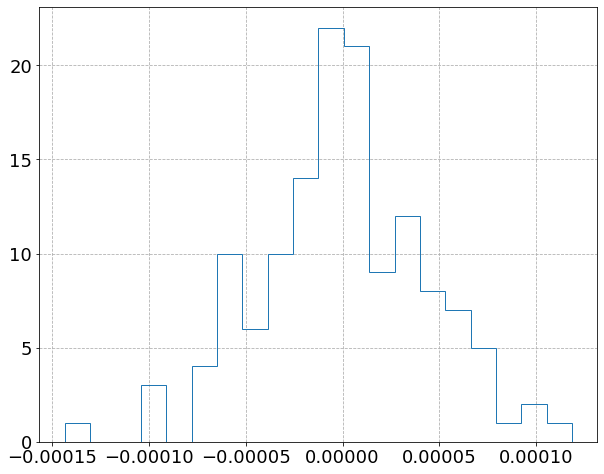

In [212]:
fig,ax =plt.subplots()
ax.hist(res / df[f'{probe}_Raw_Z'], bins=20, histtype='step');

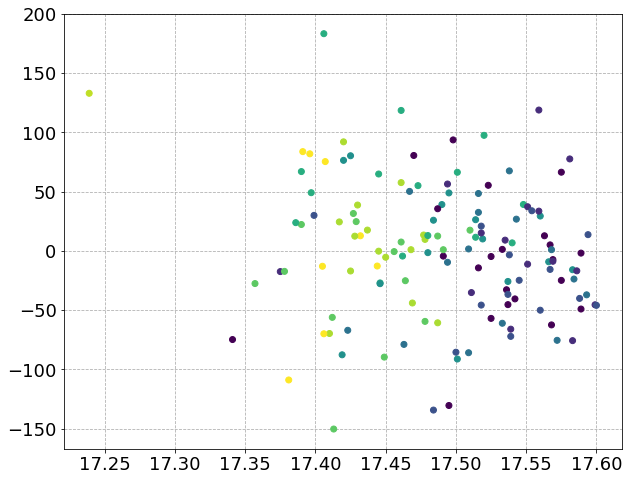

In [213]:
fig, ax = plt.subplots()

#ax.scatter(df.seconds_delta, df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_1'])
ax.scatter(df[f'{probe}_Cal_T'], res, c=df.a2)

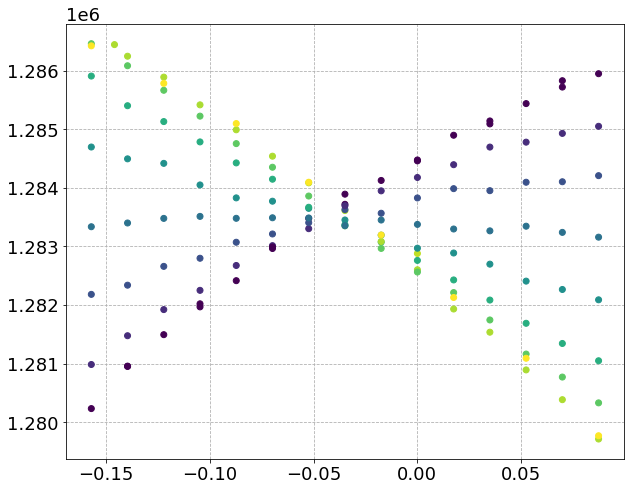

In [214]:
fig, ax = plt.subplots()

#ax.scatter(df.seconds_delta, df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_1'])
ax.scatter(df.a1, df[f'{probe}_Raw_Bmag'], c=df.a2)

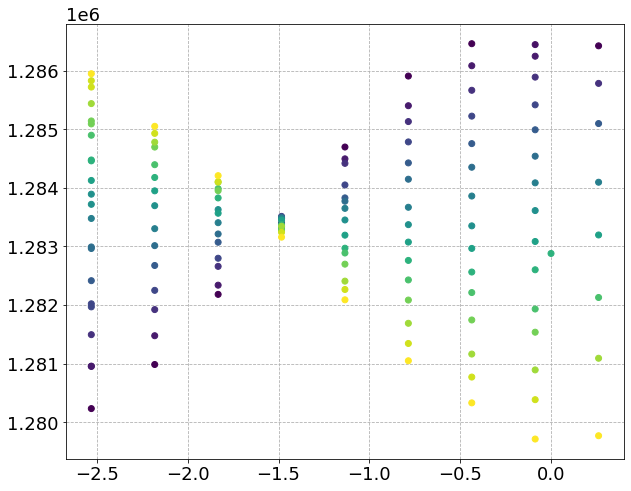

In [216]:
fig, ax = plt.subplots()
ax.scatter(df.a2, df[f'{probe}_Raw_Bmag'], c=df.a1)

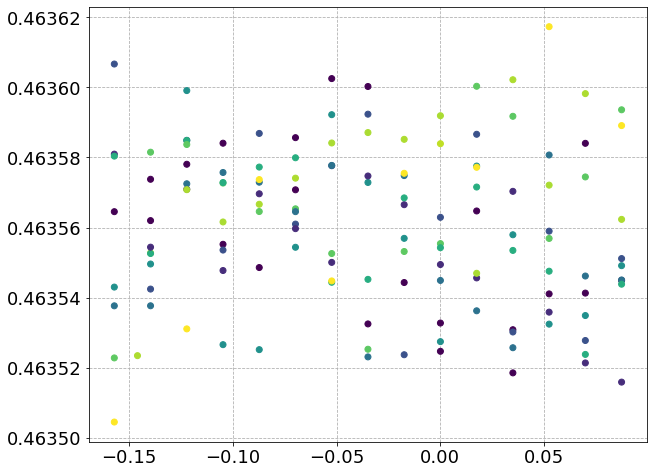

In [217]:
fig, ax = plt.subplots()

#ax.scatter(df.seconds_delta, df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_1'])
ax.scatter(df.a1, df[f'{probe}_Cal_Bmag'], c=df.a2)

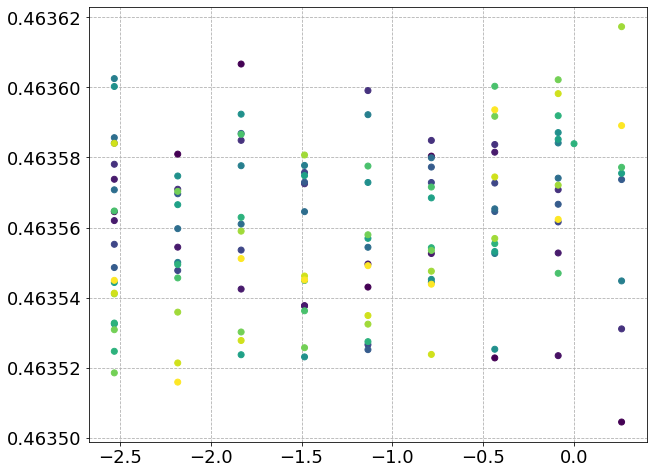

In [218]:
fig, ax = plt.subplots()
ax.scatter(df.a2, df[f'{probe}_Cal_Bmag'], c=df.a1)


In [219]:
df[f'{probe}_Cal_Bmag'].describe()

count    136.000000
mean       0.463561
std        0.000023
min        0.463504
25%        0.463545
50%        0.463562
75%        0.463578
max        0.463617
Name: 2F0000000D5EC73A_Cal_Bmag, dtype: float64

In [221]:
df_temp.query('`NMR [T]` > 0.1')['NMR [T]'].describe()

count    10.000000
mean      0.463524
std       0.000001
min       0.463523
25%       0.463523
50%       0.463523
75%       0.463525
max       0.463525
Name: NMR [T], dtype: float64

In [222]:
df_temp.query('`NMR [T]` > 0.1')['NMR [T]'].mean() - 2e-4

0.4633238055000001

In [223]:
df[f'{probe}_Cal_Bmag'].mean() - (df_temp.query('`NMR [T]` > 0.1')['NMR [T]'].mean() - 2e-4)

0.000236701408483031

# Bergsma Calibration

In [227]:
## ADD THIS TO NOTES / MAIN CODE
df['Bz_Bergsma'] = df[f'{probe}_Cal_X']
df['By_Bergsma'] = df[f'{probe}_Cal_Z']
df['Bx_Bergsma'] = df[f'{probe}_Cal_Y']


In [ ]:
fig, ax = plt.subplots()

a0 = np.radians(df['SmarAct_Meas_Angle_1'])
a0 = np.array([i if i <= np.pi else i-2*np.pi for i in a0])

ax.scatter(np.degrees(a0), df[f'{probe}_Raw_Z'], c=df['SmarAct_Pattern_Angle_2'])